In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from optimus import Optimus

C:\Users\argenisleon\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable

    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 
`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly


In [4]:
op= Optimus(master="local[*]", app_name= "optimus", verbose = True, comm=True)

INFO:optimus:Operative System:Windows
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
INFO:optimus:HADOOP_HOME=C:\opt\hadoop-2.7.7
INFO:optimus:PYSPARK_PYTHON=C:\Users\argenisleon\Anaconda3\python.exe
INFO:optimus:PYSPARK_DRIVER_PYTHON=jupyter
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java-8.0.16.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/ojdbc8.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/postgresql-42.2.5.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/presto-jdbc-0.224.jar" --driver-class-path "C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar;C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java

In [5]:
df = op.load.csv("data/crime.csv")
# df = op.load.parquet("many-columns.parquet")

In [9]:
%%time
df.count()

Wall time: 707 ms


319073

In [13]:
%%time
df.rows.approx_count()

Wall time: 11.8 s


319073

In [8]:
df.select("*").limit(100).send("crime3")

INFO:optimus:Processing Stats For columns...
INFO:optimus:Batch Stats 0. Processing columns['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']


'kurtosis' function in 'YEAR' column is returning 'nan'. Is that what you expected?. Seems that 'YEAR' has 'nan' values
'skewness' function in 'YEAR' column is returning 'nan'. Is that what you expected?. Seems that 'YEAR' has 'nan' values


INFO:optimus:Batch Histogram 0. Processing columns['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH']
INFO:optimus:Batch Histogram 1. Processing columns['DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']
INFO:optimus:Processing Frequency ...
INFO:optimus:`INCIDENT_NUMBER`,`OFFENSE_CODE_GROUP`,`OFFENSE_DESCRIPTION`,`DISTRICT`,`REPORTING_AREA`,`SHOOTING`,`OCCURRED_ON_DATE`,`DAY_OF_WEEK`,`UCR_PART`,`STREET`,`Location` column(s) was not processed because is/are not byte,short,big,int,double,float
INFO:optimus:`INCIDENT_NUMBER`,`OFFENSE_CODE_GROUP`,`OFFENSE_DESCRIPTION`,`DISTRICT`,`REPORTING_AREA`,`SHOOTING`,`OCCURRED_ON_DATE`,`DAY_OF_WEEK`,`UCR_PART`,`STREET`,`Location` column(s) was not processed because is/are not array,vector,byte,date,binary
INFO:optimus:Outputting 0 columns after filtering. Is this expected?


INFO:optimus:{"count_types": {"categorical": 9, "numeric": 6, "null": 1, "date": 1, "binary": 0, "array": 0}, "total_count_dtypes": 4, "dtypes_list": ["categorical", "numeric", "null", "date"], "columns": {"INCIDENT_NUMBER": {"stats": {"count_uniques": 95, "min": "I182070827", "max": "I182070945", "stddev": null, "kurtosis": null, "mean": null, "skewness": null, "sum": null, "variance": null, "zeros": 0, "count_na": 0, "p_count_na": 0.0, "p_count_uniques": 95.0}, "frequency": [{"value": "I182070889", "count": 3, "percentage": 3.0}, {"value": "I182070904", "count": 2, "percentage": 2.0}, {"value": "I182070875", "count": 2, "percentage": 2.0}, {"value": "I182070873", "count": 2, "percentage": 2.0}, {"value": "I182070837", "count": 2, "percentage": 2.0}, {"value": "I182070833", "count": 2, "percentage": 2.0}, {"value": "I182070829", "count": 2, "percentage": 2.0}, {"value": "I182070945", "count": 1, "percentage": 1.0}, {"value": "I182070943", "count": 1, "percentage": 1.0}, {"value": "I18

INFO:optimus:gAAAAABdbuxRwg7TosEBZ62gi2KbciU7qVXB2hbf900U4cFOmRHd56oOtm96wJPHfpgH55bhEysvRiSy-DsiwIreSSEcqinEA4r1KSIyWqGLQi6YQY649alrM_MIWpI12L3S-3A7fpvRrs3IWT0CB6k2gogsIahugtyBiaIgpo0RB9YTrOFBVhXZOs8mRnEOybfLAPMxX0qhugjTG7YBH5RoiJ0ozpOyY14yt08dz9ZMqKlWACuQKN34qToB5Jy4VDH9nj32dANDorwNmHOfi3zCpuBeMMhtnLWKeXO2aDutW5k9ZH_l_bnwuhmBPGoLNT45ZpSC8ZCKUz0Rsfz--iCJJYnLP__TghfwI02_gyrkdCH5zlSCDcF2x16boJIhw3u6bIBva8wrWBL7okPMjovRp9zCYu5-pVIMsmn5bsOzkuHaGyEx3zZD1PvEiz40fSP9OAqqr64fw9laO6K1C_w9I1x-c-nN-kmjKQnq5kNzyIv0K4Nm-cYU9lpjFXoiD3hW1eafob9d8qsg31269fizMSIkgz_fwkwwTQ9he65DXz0SHuj-qrxkQFUuhTeGgRWF5BFg9DO-wM9QPCAamSdkZMZ_lIxe2FBW5fI5Ma1L3xwTXvcyyuYpy18VhGEAYuD7Nz_aD61ss56Lpo7O1dYFXwynbfPoiymol7f_oglvKB61OpxAVQkYgRXJaoWzivou3CdvZ0DPYZHRMud9Jl_WTNEMOGJ55gPSehMGAt1mW7E3SLqspR3JNsPxr9ybFvpFT0zE2GdqIijgTZDJXngnpcso9c7yX-F4NT-mOg_wA9UuY5KAmIRn1mqbqKQ-XI1pitmVXRHt6EF9qosRw4vFUHvpMx8iaKWk9TNP7LCtfb1lYPDb5OnJTVYQA_9f2jsnmaOX1UqR0a3WhLfKGP4Bj3GnanlVZA2m0_JQnvHdm7hl6AFmullZUX6bhRXxhTUTSESLvo6-6VTTKb9p0QOc-hH

Data sent 



In [9]:
df.get_meta()

{'file_name': 'crime.csv'}

In [6]:
df.table()

In [8]:
df.cols.hist(['DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'])

INFO:optimus:hist() executed in 14.14 sec


{'DAY_OF_WEEK': {'hist': [{'count': 0.0, 'lower': 0.0, 'upper': 2.5},
   {'count': 0.0, 'lower': 2.5, 'upper': 5.0},
   {'count': 180870.0, 'lower': 5.0, 'upper': 7.5},
   {'count': 138203.0, 'lower': 7.5, 'upper': 10.0},
   {'count': 0.0, 'lower': 10.0, 'upper': 12.5},
   {'count': 0.0, 'lower': 12.5, 'upper': 15.0},
   {'count': 0.0, 'lower': 15.0, 'upper': 17.5},
   {'count': 0.0, 'lower': 17.5, 'upper': 20.0},
   {'count': 0.0, 'lower': 20.0, 'upper': 22.5},
   {'count': 0.0, 'lower': 22.5, 'upper': 25.0},
   {'count': 0.0, 'lower': 25.0, 'upper': 27.5},
   {'count': 0.0, 'lower': 27.5, 'upper': 30.0},
   {'count': 0.0, 'lower': 30.0, 'upper': 32.5},
   {'count': 0.0, 'lower': 32.5, 'upper': 35.0},
   {'count': 0.0, 'lower': 35.0, 'upper': 37.5},
   {'count': 0.0, 'lower': 37.5, 'upper': 40.0},
   {'count': 0.0, 'lower': 40.0, 'upper': 42.5},
   {'count': 0.0, 'lower': 42.5, 'upper': 45.0},
   {'count': 0.0, 'lower': 45.0, 'upper': 47.5},
   {'count': 0.0, 'lower': 47.5, 'upper': 5

INFO:optimus:Config.ini not found
INFO:optimus:Processing Stats For columns...
INFO:optimus:Batch Stats 0. Processing columns['YEAR']


'kurtosis' function in 'YEAR' column is returning 'nan'. Is that what you expected?. Seems that 'YEAR' has 'nan' values
'skewness' function in 'YEAR' column is returning 'nan'. Is that what you expected?. Seems that 'YEAR' has 'nan' values


INFO:optimus:Batch Histogram 0. Processing columns['YEAR']
INFO:optimus:Processing Frequency ...
INFO:optimus:`INCIDENT_NUMBER`,`OFFENSE_CODE_GROUP`,`OFFENSE_DESCRIPTION`,`DISTRICT`,`REPORTING_AREA`,`SHOOTING`,`OCCURRED_ON_DATE`,`DAY_OF_WEEK`,`UCR_PART`,`STREET`,`Location` column(s) was not processed because is/are not byte,short,big,int,double,float
INFO:optimus:`INCIDENT_NUMBER`,`OFFENSE_CODE_GROUP`,`OFFENSE_DESCRIPTION`,`DISTRICT`,`REPORTING_AREA`,`SHOOTING`,`OCCURRED_ON_DATE`,`DAY_OF_WEEK`,`UCR_PART`,`STREET`,`Location` column(s) was not processed because is/are not array,vector,byte,date,binary
INFO:optimus:Outputting 0 columns after filtering. Is this expected?


column_data {'YEAR': [{'count': 50, 'lower': 2018, 'upper': 2019}]}



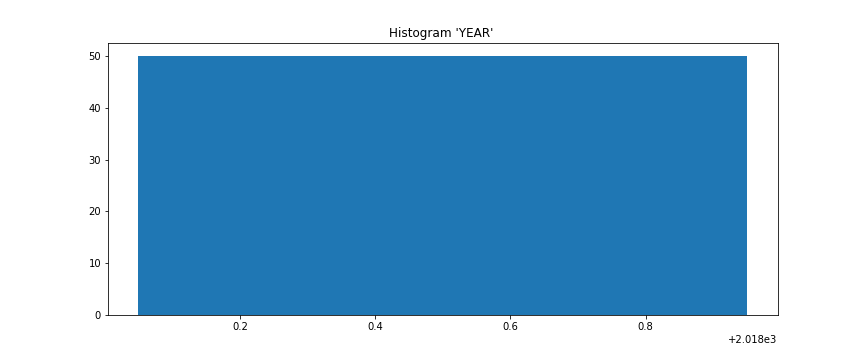

INFO:optimus:run() executed in 20.39 sec


Wall time: 20.4 s


In [61]:
%%time
from optimus.profiler.profiler import Profiler
p = Profiler()


a = p.run(b, "YEAR")

In [5]:
from pyspark.sql import DataFrame

class Cols:
    def unique(self, x):
        print(x)
    def select(x):
        print(x)
    def frequency(self, x):
        print(x)
    def count(self, x):
        print(x)
    
DataFrame.new_cols = Cols()    
source_df.new_cols.count(2)

NameError: name 'source_df' is not defined

In [ ]:
df.cols.hist("MONTH")

In [50]:
df.get_meta("a")

In [2]:
from pyspark.sql import Row, SparkSession
spark = SparkSession.builder\
    .master("local[4]")\
    .appName("sql.functions tests")\
    .getOrCreate()
sc = spark.sparkContext

In [12]:
df = df.h_repartition()

In [ ]:
df.cols.frequency("LOCNCODE")

In [ ]:
df.table()

In [16]:
df.select(["*"]).limit(100).send("many-columns")

AnalysisException: 'Invalid view name: many-columns;'

In [30]:
df= df.repartition(8)
df=df.cache()

In [ ]:
p.

INFO:optimus:Config.ini not found
INFO:optimus:Procesing General Stats...
INFO:optimus:Batch 0. Processing columns['LOCNCODE', 'LOCNDSCR', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'CITY', 'STATE', 'ZIPCODE', 'COUNTRY', 'Location_Segment', 'PAQ', 'TIPUNI', 'Tipo_unidad', 'ITEMNMBR', 'ITMSHNAM', 'MZ', 'LT', 'EDIF', 'NIVEL', 'NOUNI']:
INFO:optimus:Batch 1. Processing columns['CONDO', 'REGIMEN', 'ETAPA', 'PROTO', 'ITEMDESC', 'NIVELES', 'COCHERA', 'RECAM', 'ALCOB', 'BANOS', 'Num_Balcon', 'SALA', 'COMEDOR', 'COCINA', 'Cuarto_Lavado', 'Cuarto_Servicio', 'OTROX', 'OTROX1', 'SupCons', 'PATIOSERV']:


'kurtosis' function in 'NIVELES' column is returning 'nan'. Is that what you expected?. Seems that 'NIVELES' has 'nan' values
'skewness' function in 'NIVELES' column is returning 'nan'. Is that what you expected?. Seems that 'NIVELES' has 'nan' values
'kurtosis' function in 'ALCOB' column is returning 'nan'. Is that what you expected?. Seems that 'ALCOB' has 'nan' values
'skewness' function in 'ALCOB' column is returning 'nan'. Is that what you expected?. Seems that 'ALCOB' has 'nan' values
'kurtosis' function in 'Cuarto_Servicio' column is returning 'nan'. Is that what you expected?. Seems that 'Cuarto_Servicio' has 'nan' values
'skewness' function in 'Cuarto_Servicio' column is returning 'nan'. Is that what you expected?. Seems that 'Cuarto_Servicio' has 'nan' values


INFO:optimus:Batch 2. Processing columns['TERRAZA', 'BALCON', 'AZOTEA', 'Otros', 'AREATOT', 'FRENTE', 'Sup_Terreno', 'EXCEDENTE', 'OTRO1', 'OTRO2', 'TAMANO', 'UBICAVER', 'UBICAHORI', 'QTYONHND_', 'QTYSOLD', 'INACTIVE', 'UOMPRICE', 'MONTOAPA', 'PAGINI', 'ENGANCHE']:


'stddev' function in 'OTRO1' column is returning 'nan'. Is that what you expected?. Seems that 'OTRO1' has 'nan' values
'kurtosis' function in 'OTRO1' column is returning 'nan'. Is that what you expected?. Seems that 'OTRO1' has 'nan' values
'skewness' function in 'OTRO1' column is returning 'nan'. Is that what you expected?. Seems that 'OTRO1' has 'nan' values
'variance' function in 'OTRO1' column is returning 'nan'. Is that what you expected?. Seems that 'OTRO1' has 'nan' values


INFO:optimus:Batch 3. Processing columns['FECHESCRIPRO', 'FECHAENTREGA', 'FECHASALIDAVENTAS', 'LIBERADO_NOLIBERADO', 'ACTIVO_INACTIVO', 'Estatus1Vivienda', 'Estatus2Vivienda', 'CUSTNMBR', 'Nombre_Completo', 'cNombre', 'cApellidoPaterno', 'cApellidoMaterno', 'cRfc', 'cCurp', 'fkIdGradoInteres', 'cSexo', 'cEmail', 'cTelefonoCasa', 'cTelefonoCelular', 'cTelefonoTrabajo']:
INFO:optimus:Batch 4. Processing columns['cNumeroSeguroSocial', 'dFechaNacimiento', 'cEstadoCivil', 'cRegimenConyugal', 'cNacionalidad', 'cLugarNacimiento', 'cRecomendadoPor', 'fkIdMedio', 'cMedioContacto', 'cCalle', 'cNumeroExterior', 'cNumeroInterior', 'cColonia', 'cMunicipio', 'cEstado', 'cPais', 'cCodigoPostal', 'nTiempoResidencia', 'cComentario', 'cNumeroIdentificacion']:
INFO:optimus:Batch 5. Processing columns['cTipoIdentificación', 'REFERENCIA', 'FACTURA', 'NOTACR', 'Precio_cierre', 'Precio_cierre_Tot', 'Aumento_al_Contrato', 'Condonacón', 'Precio_Escritura_Total', 'Precio_Dev', 'Precio_Dev_Total', 'Notarios_Proy

'kurtosis' function in 'cTipoIdentificación' column is returning 'nan'. Is that what you expected?. Seems that 'cTipoIdentificación' has 'nan' values
'skewness' function in 'cTipoIdentificación' column is returning 'nan'. Is that what you expected?. Seems that 'cTipoIdentificación' has 'nan' values


INFO:optimus:Batch 6. Processing columns['Vigencia_Apartado', 'FechaVencimientoApartado', 'FECHA_SolDictamen', 'FECHA_ProcDictamen', 'FECHA_DictaminadoLlamada', 'FECHA_DictaminadoFirma', 'FECHA_Dictaminado', 'FECHA_Rechazado', 'FECHA_EscrituraAvaluo', 'FECHA_EscrituraFolio', 'FolioEscsritura', 'FECHA_EscrituraReal', 'FECHA_Cancelado', 'FECHA_Liberado', 'FECHA_Entregado', 'MotivoCancelacion']:
INFO:optimus:general_stats() executed in 349.37 sec
INFO:optimus:Using 'column_exp' to process column 'LOCNCODE' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'LOCNDSCR' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'ADDRESS1' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'ADDRESS2' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'ADDRESS3' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'CITY' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'S

1180
21
0
0
0
2
0
0.0
0
9.15
1.31
1.0
3.33
0.0
0.0
0.0
0.0
1.45
0.0
35.83
0.0
0.0
0.0
121
0
-1
0
0
0
0
0.0
0.0
0.0
-182087.28
0.0
-3254625.33
-3434625.34
-158024.86
-598998.68
-3433064.95
-3990108.68
0



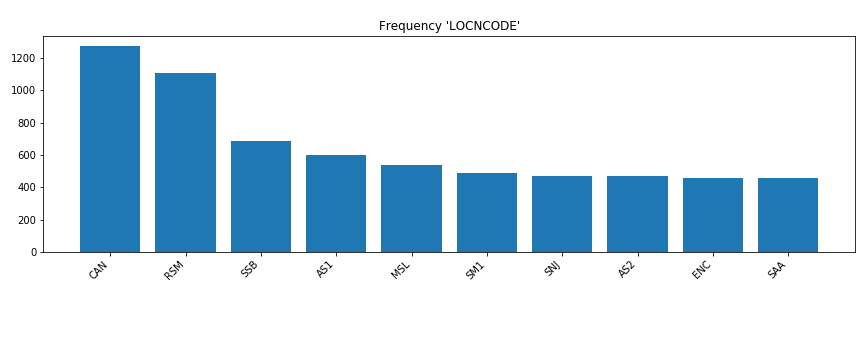
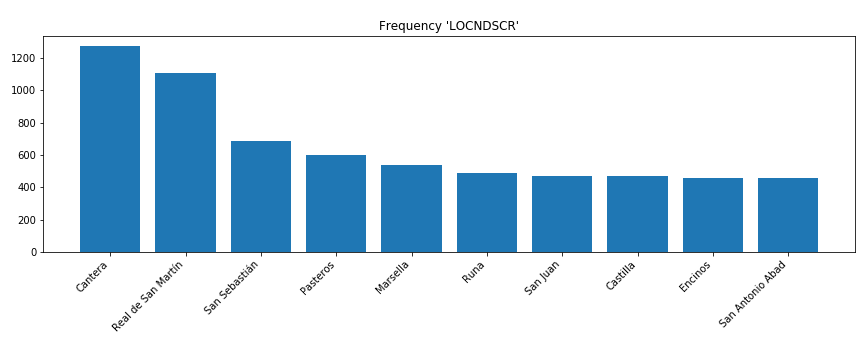
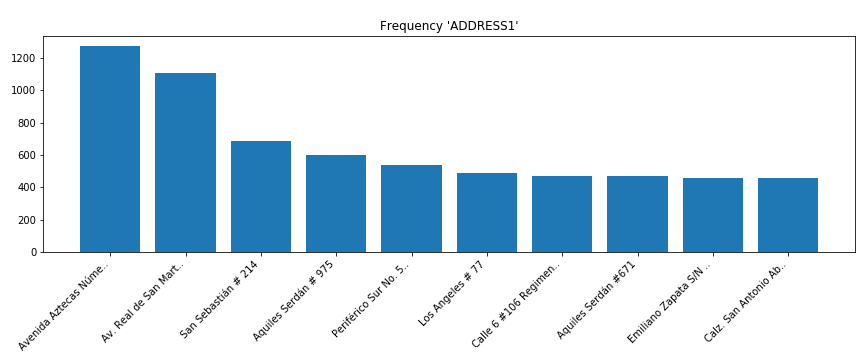
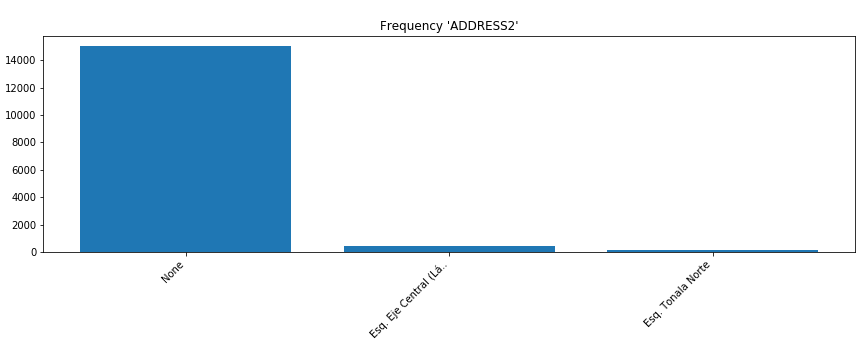
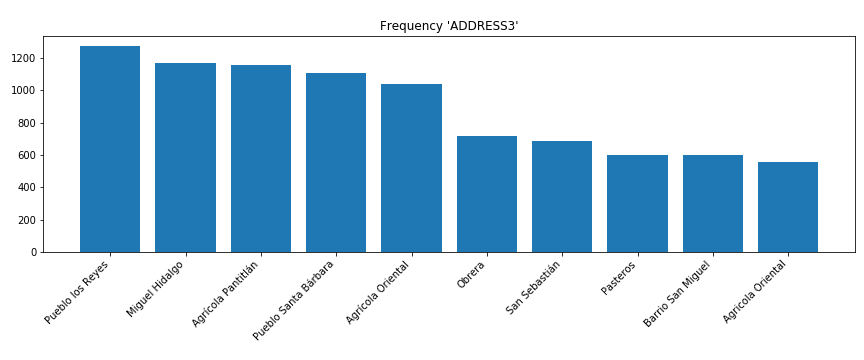
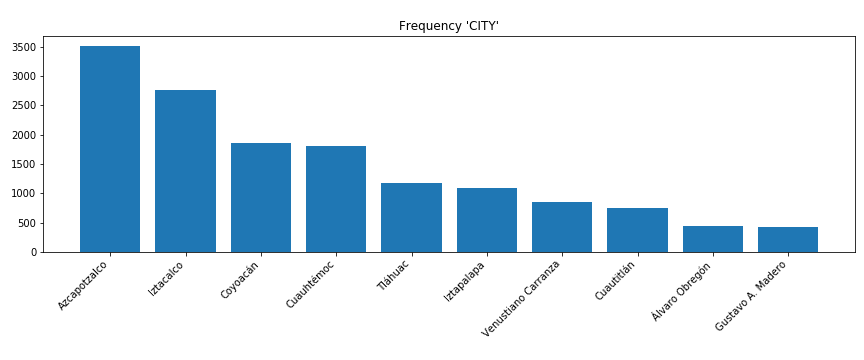
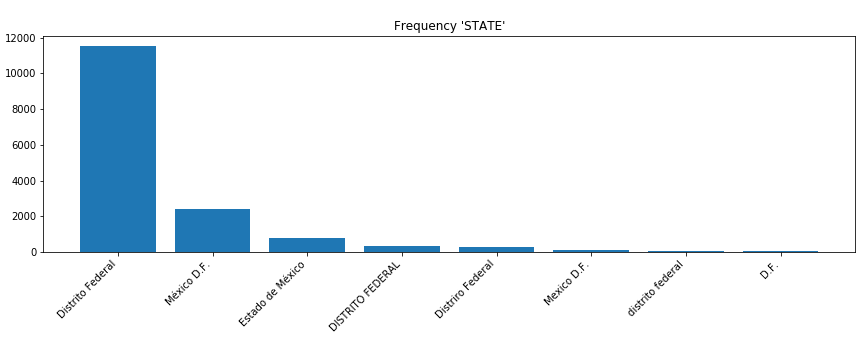
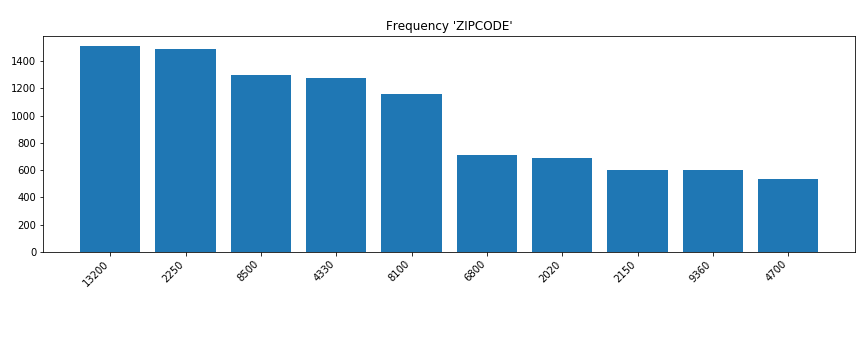
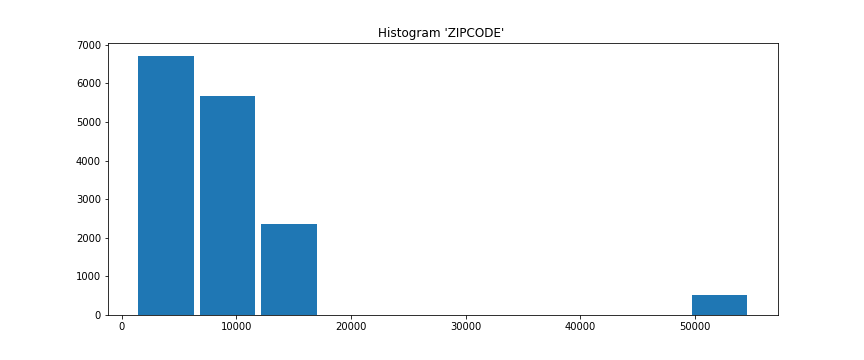
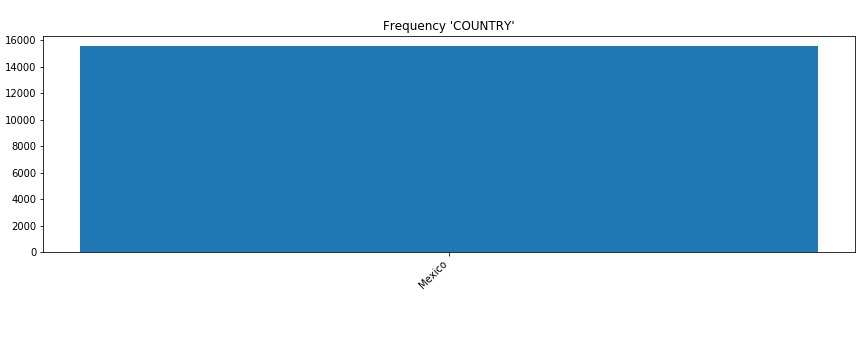
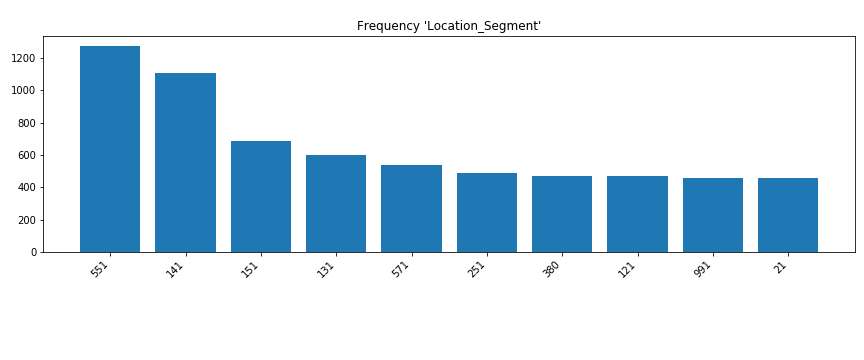
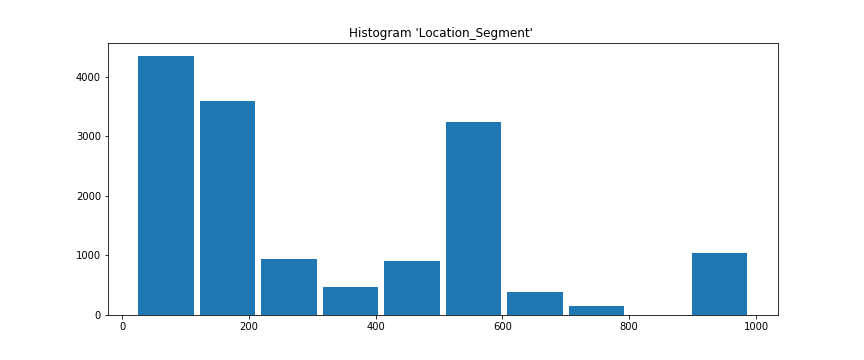
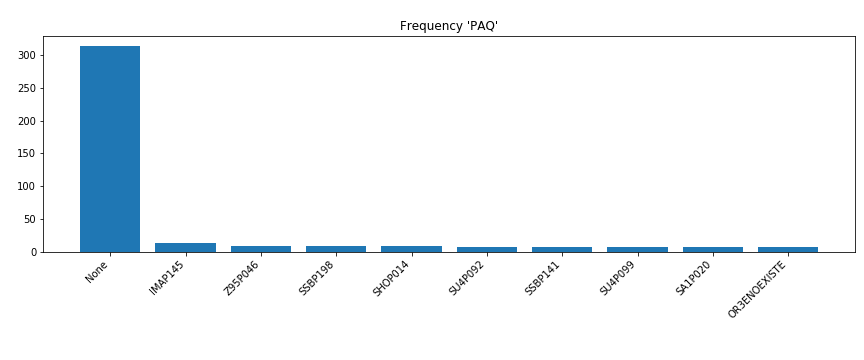
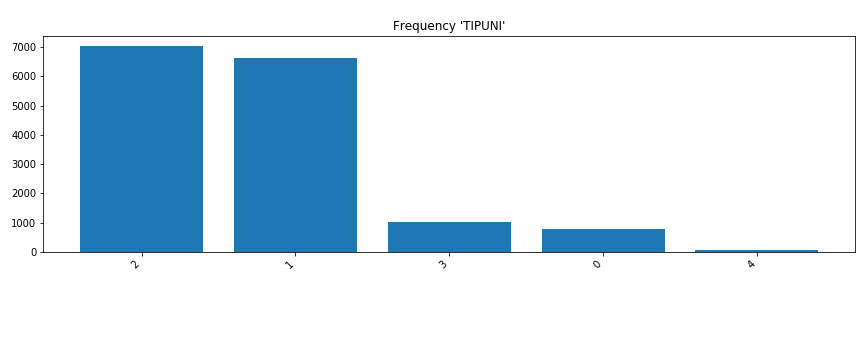
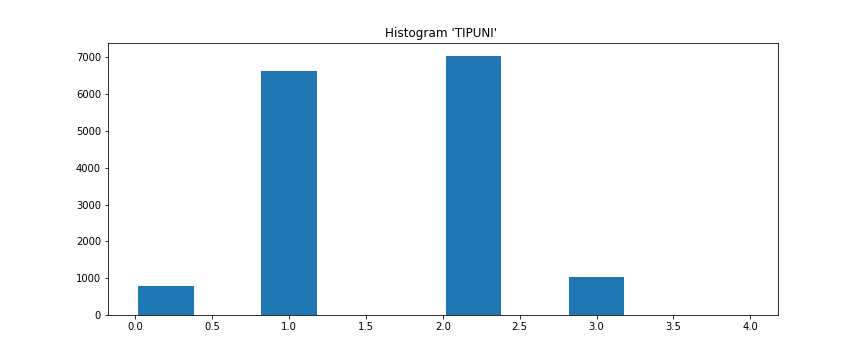
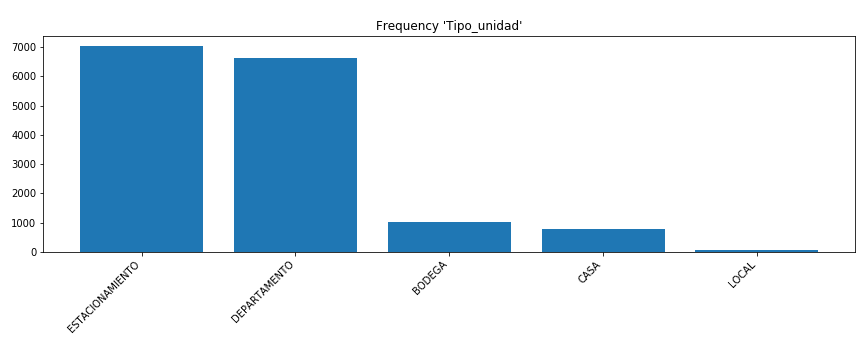
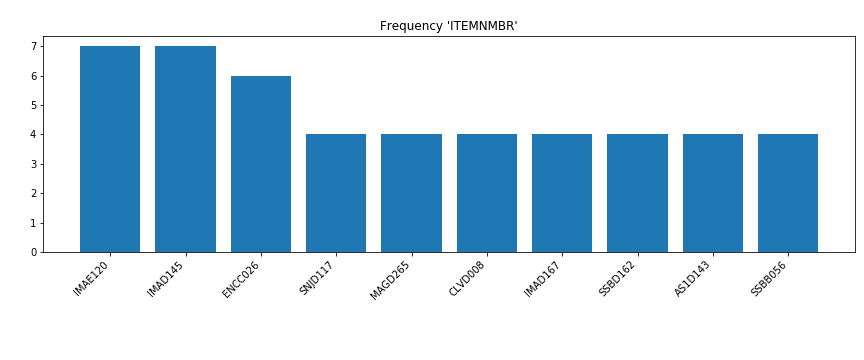
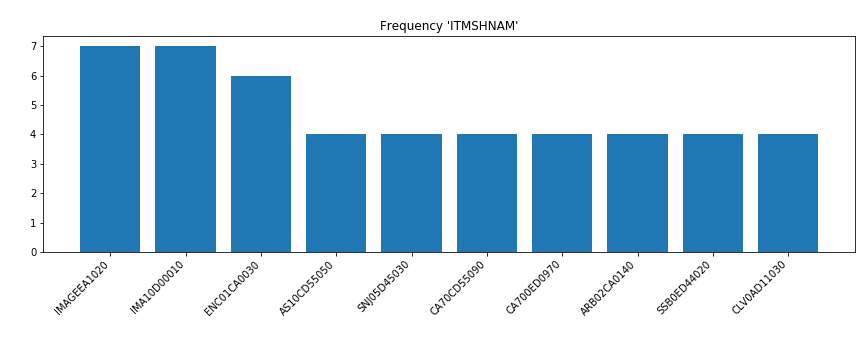
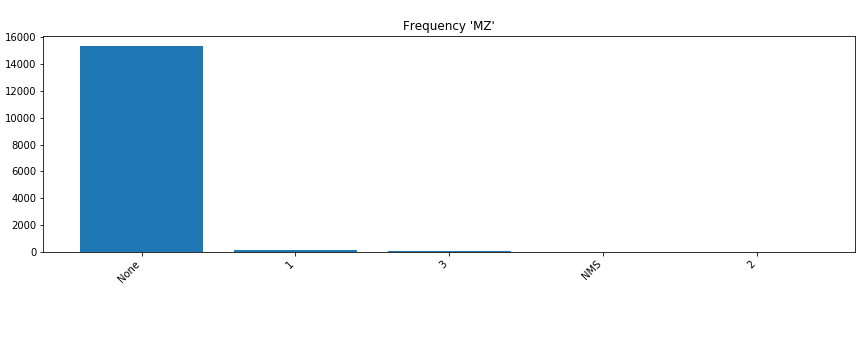
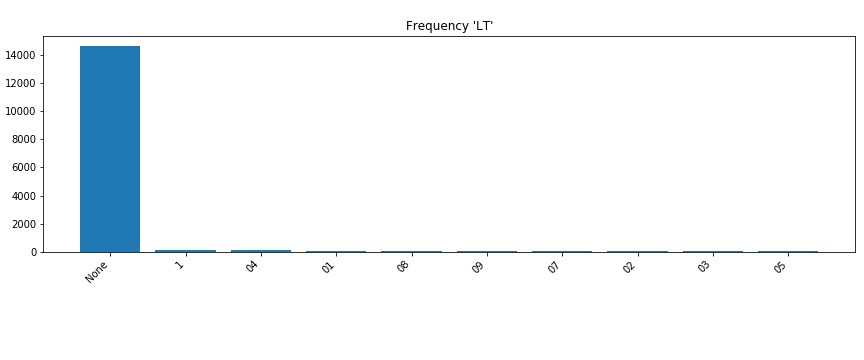
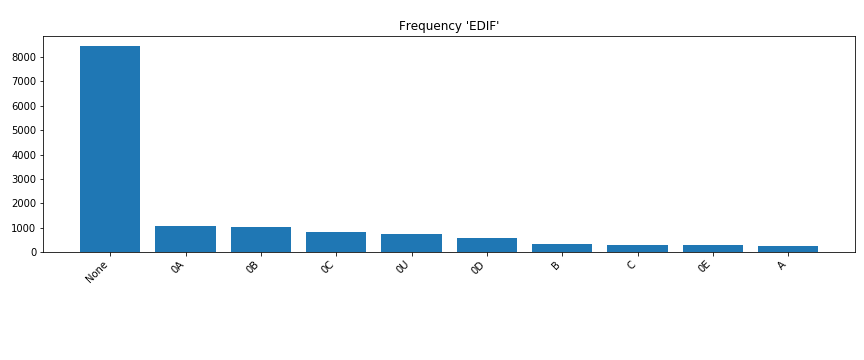
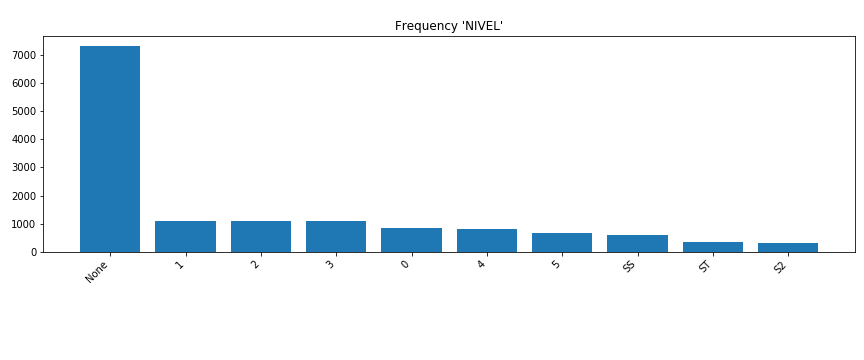
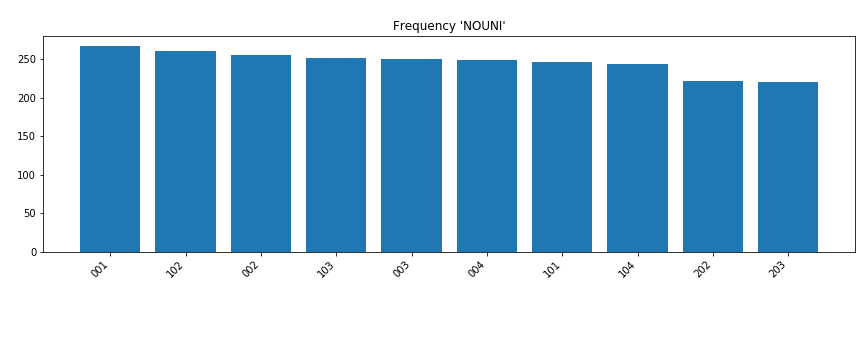
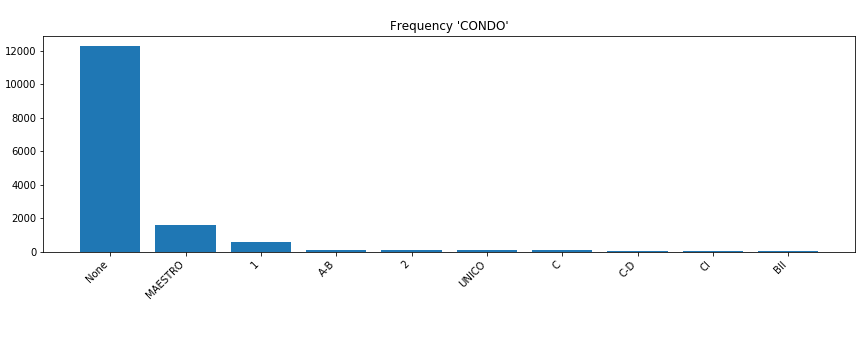
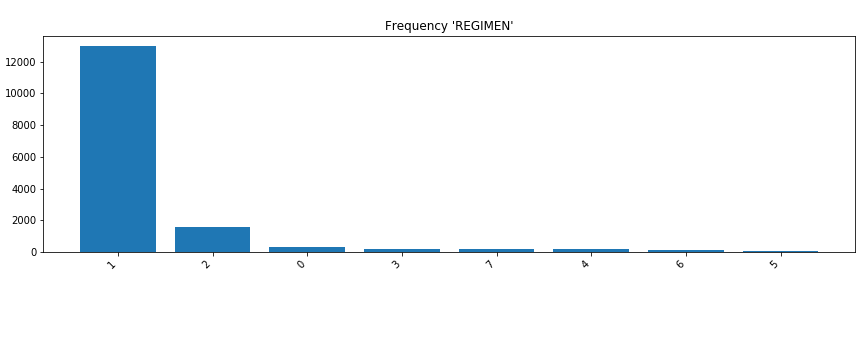
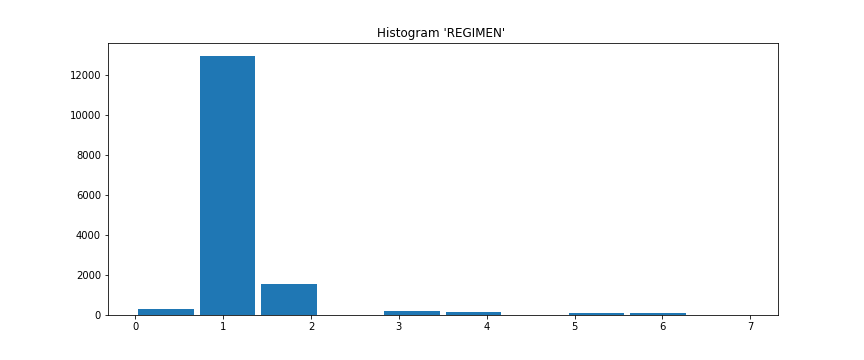
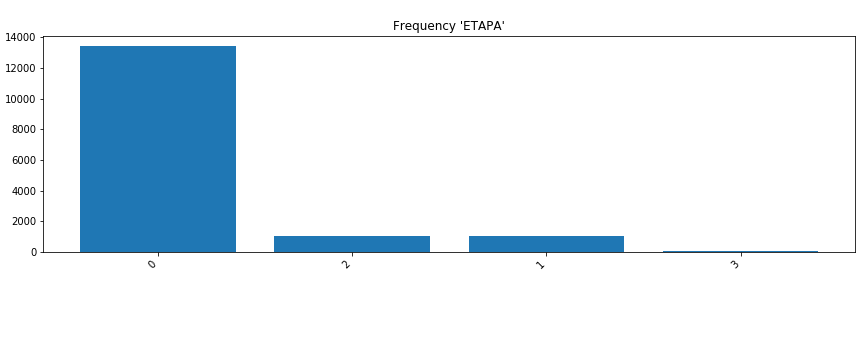
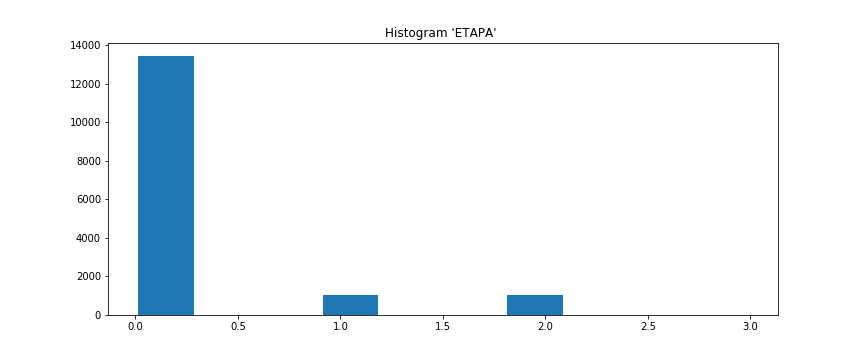
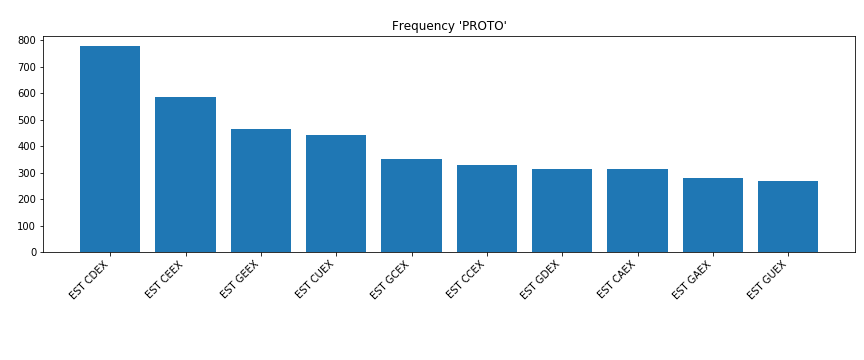
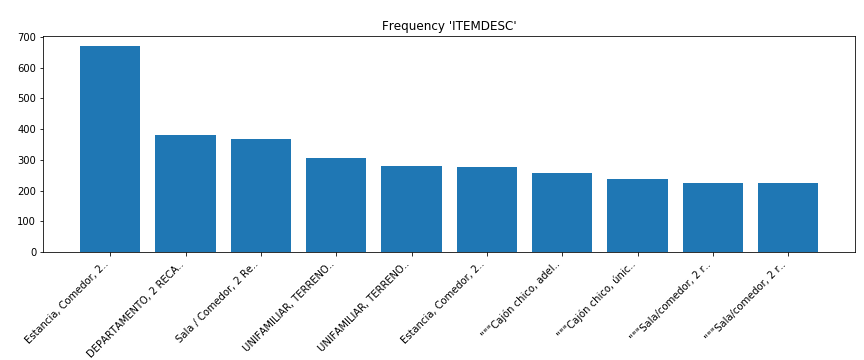
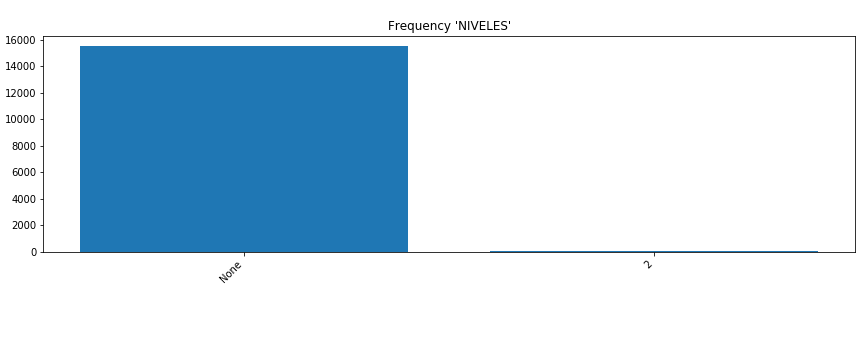
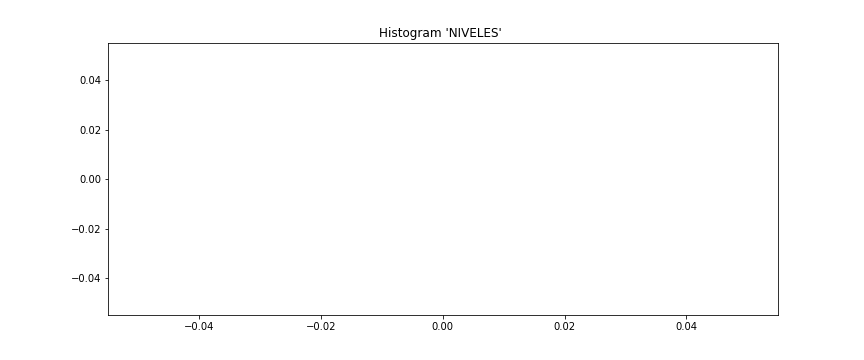
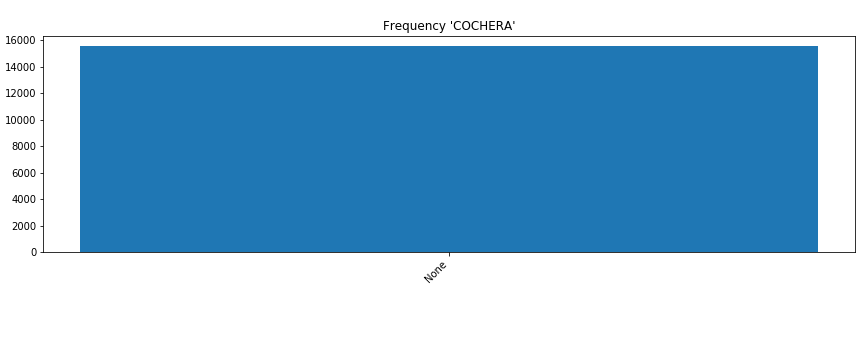
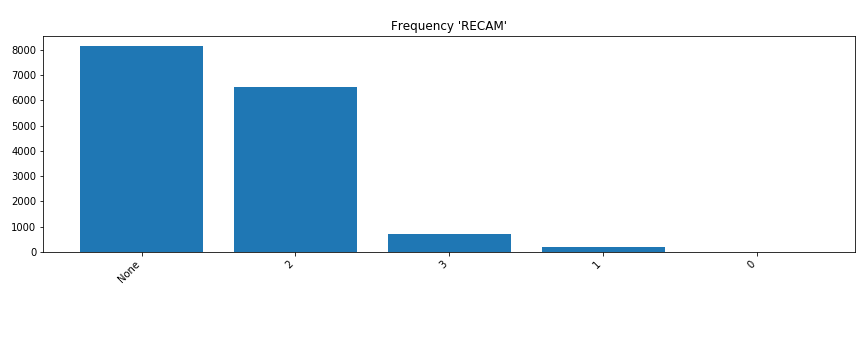
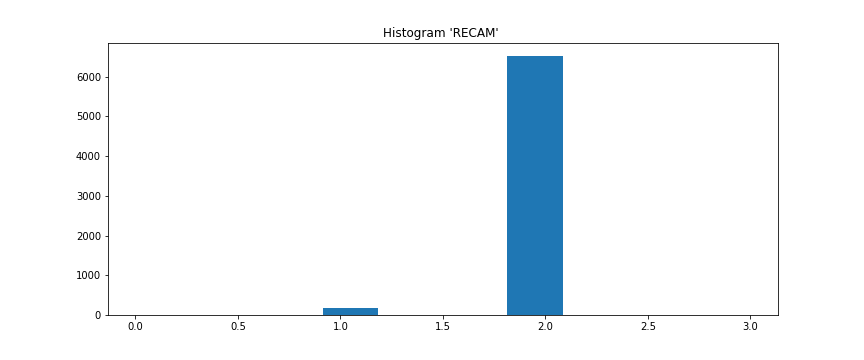
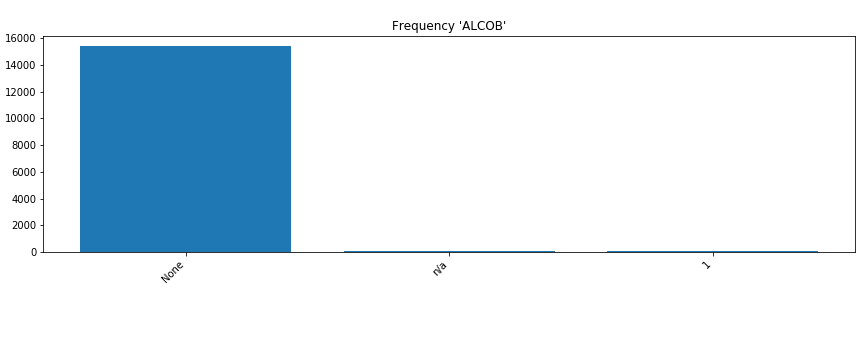
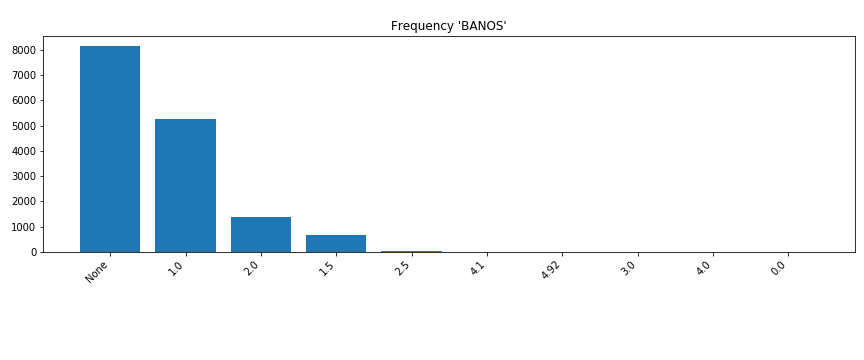
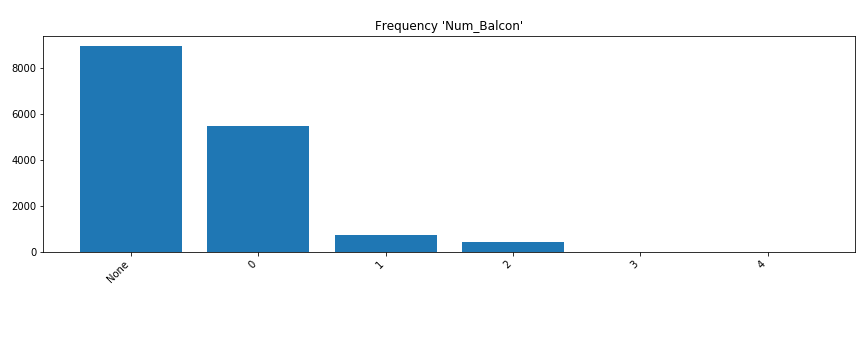
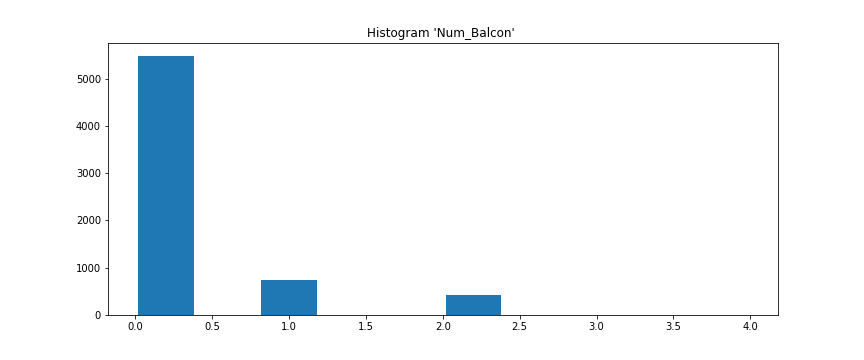
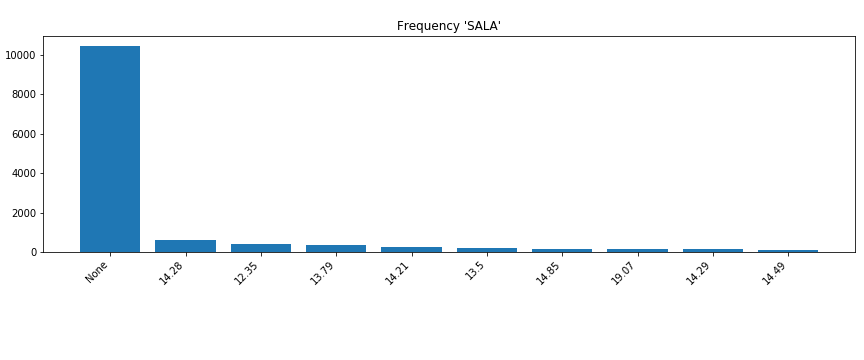
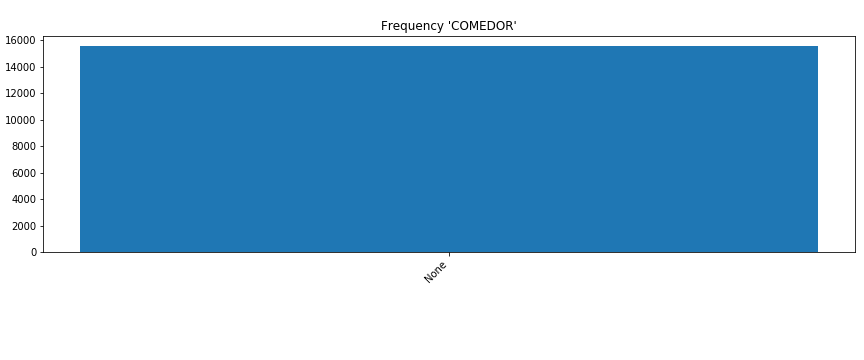
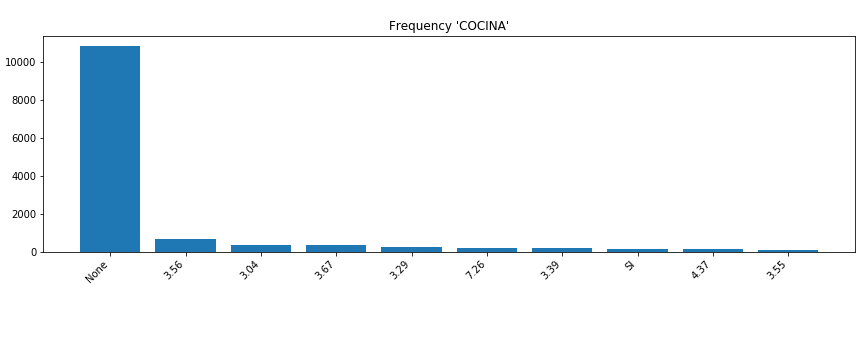
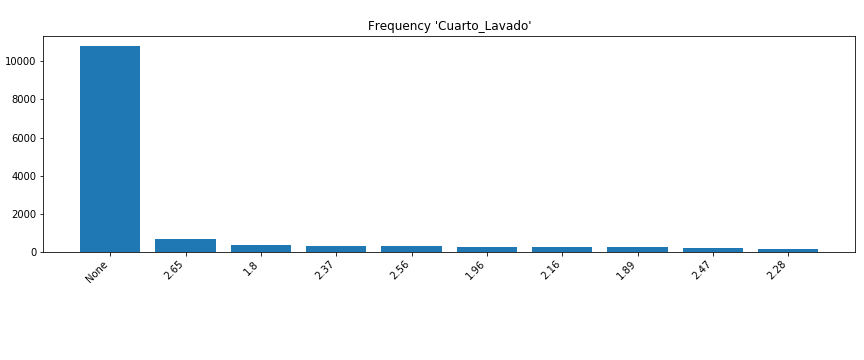
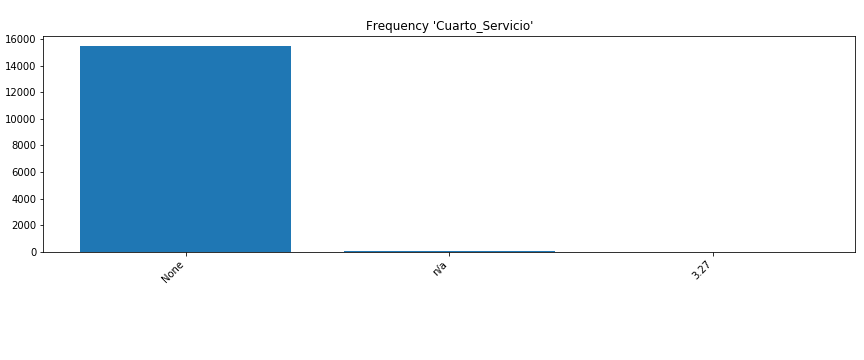
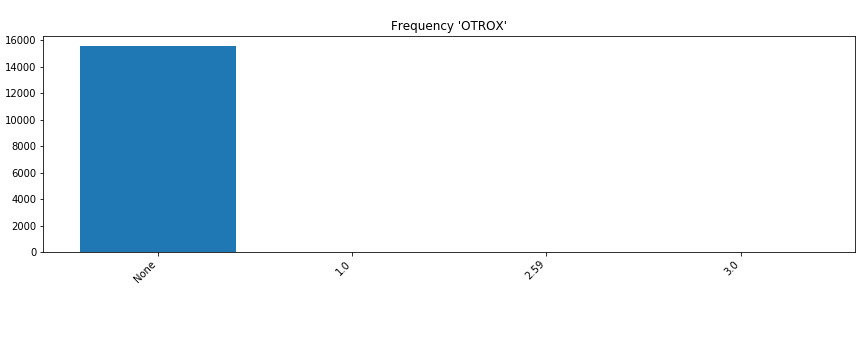
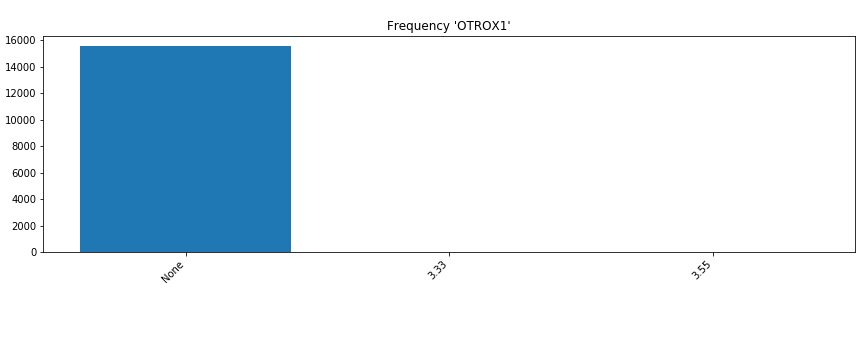
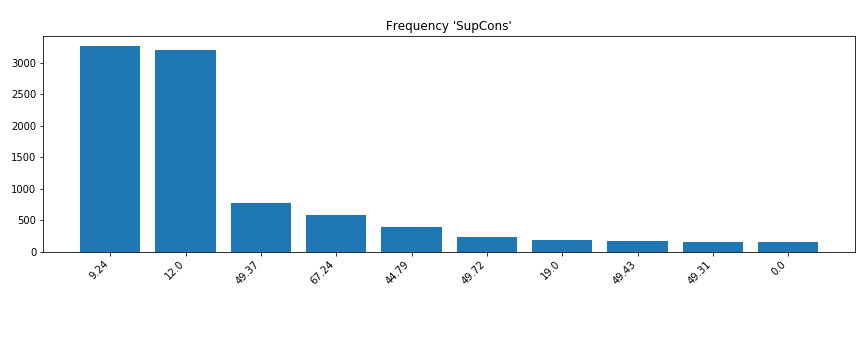
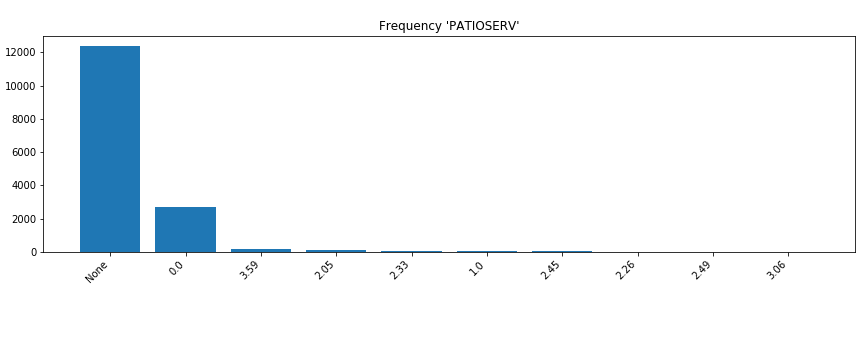
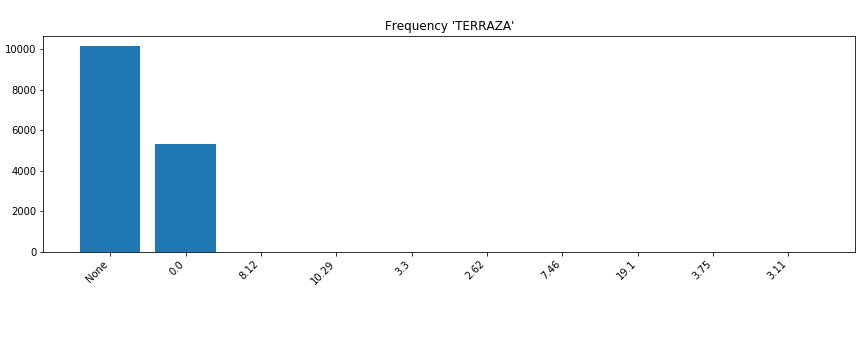
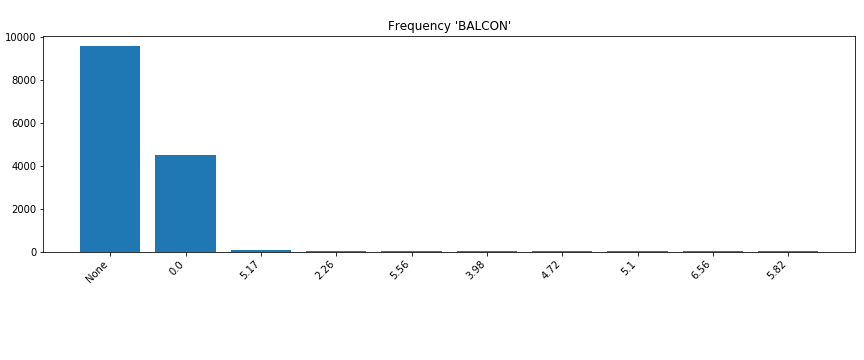
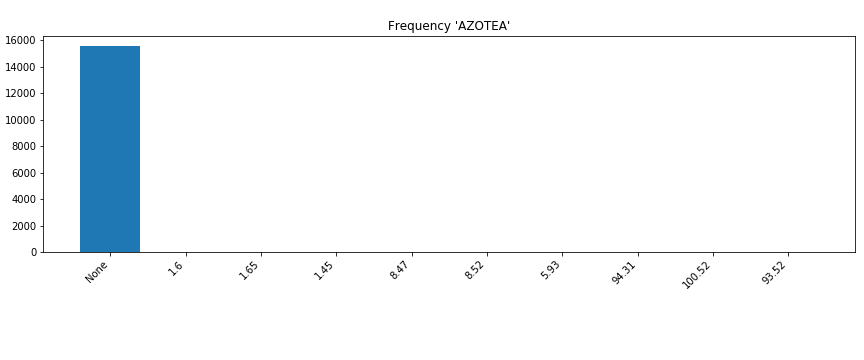
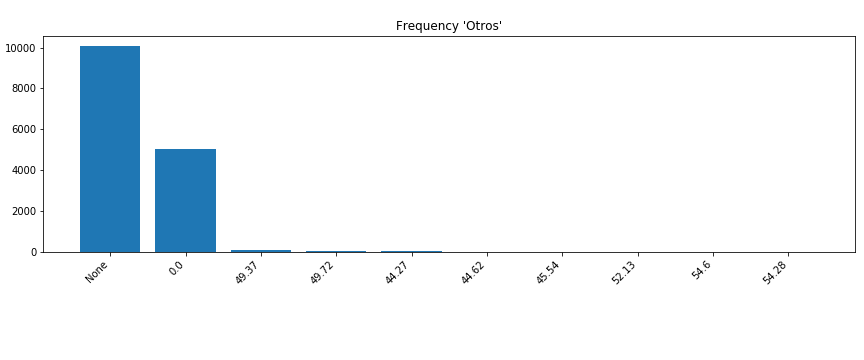
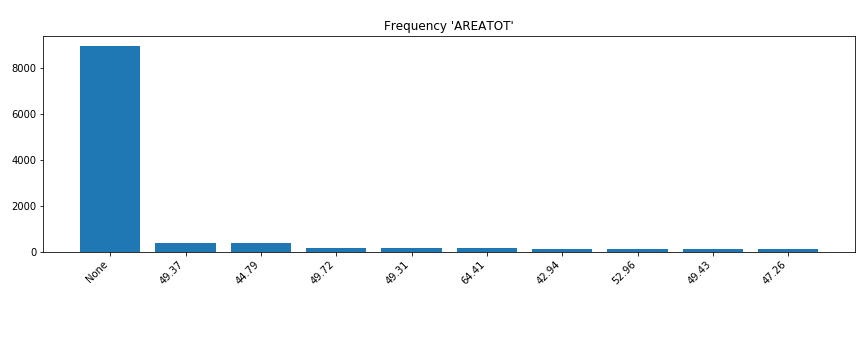
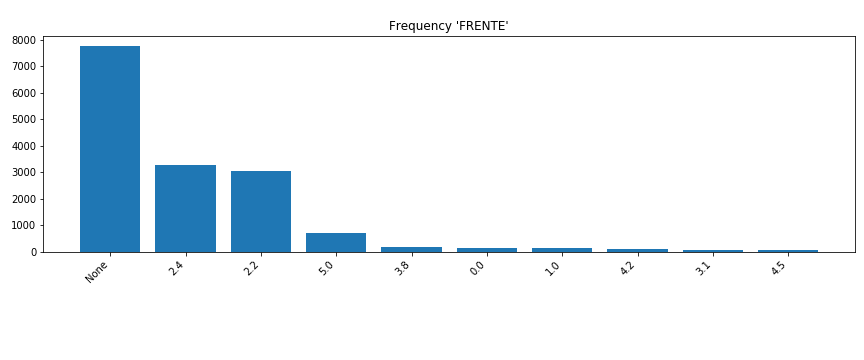
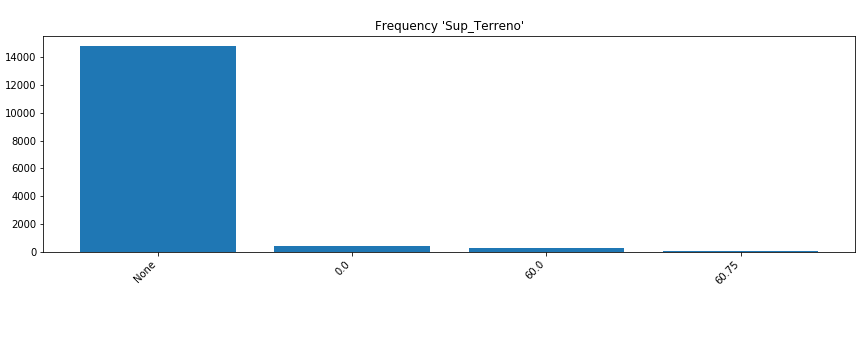
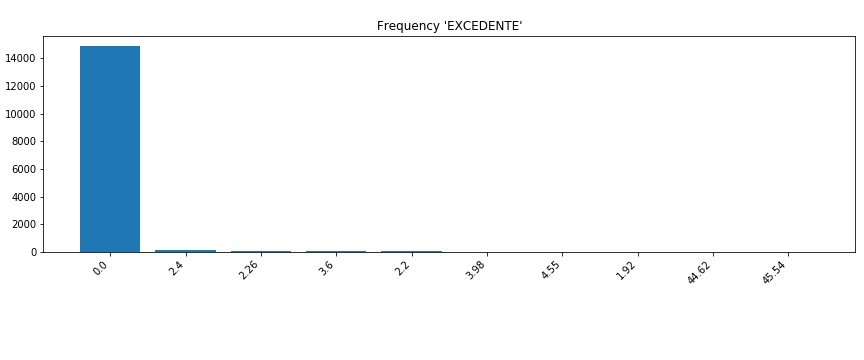
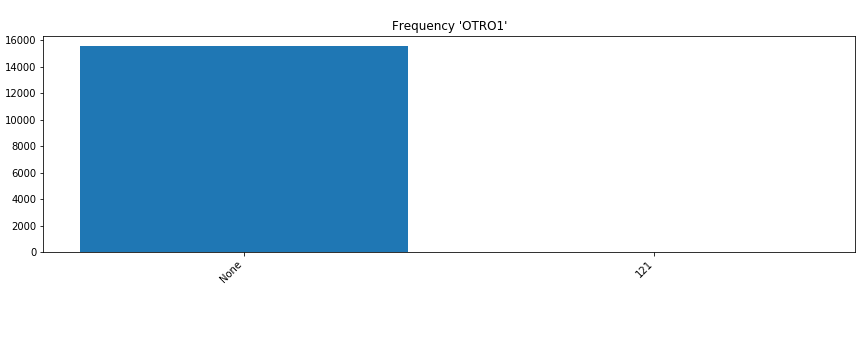
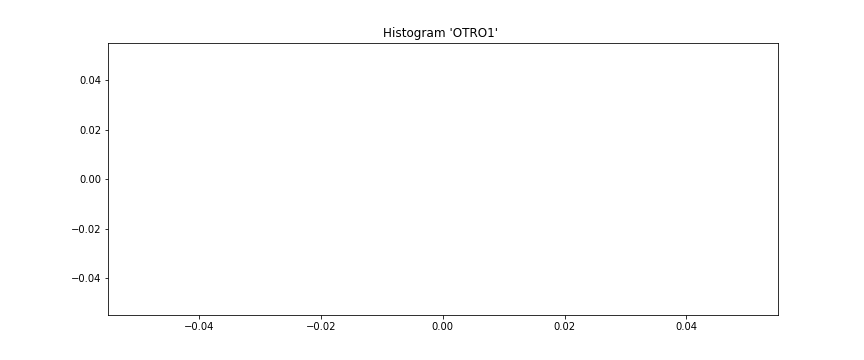
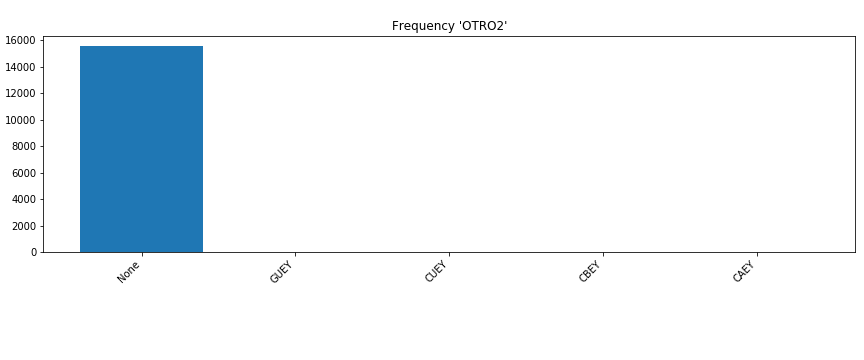
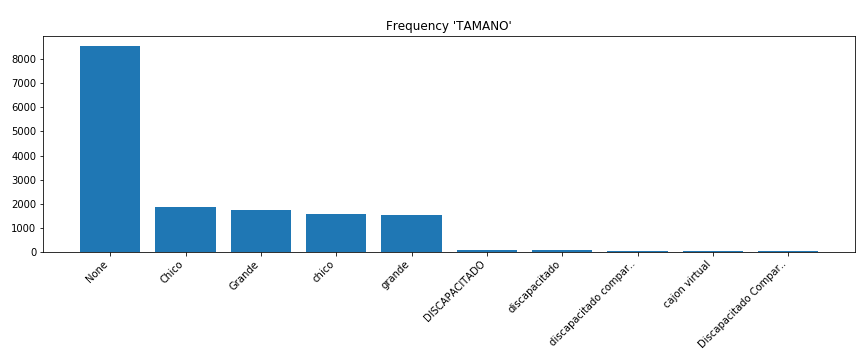
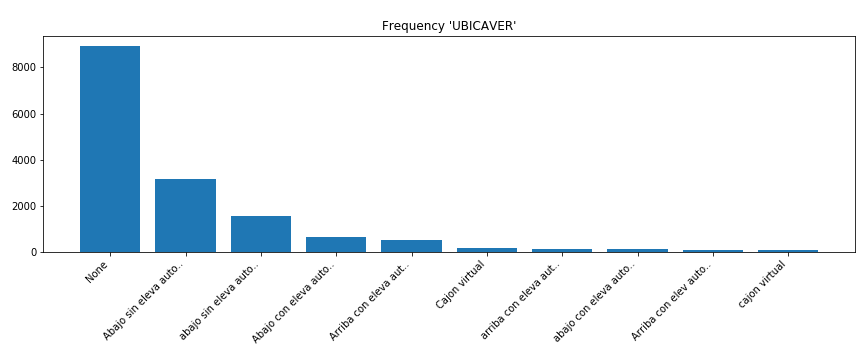
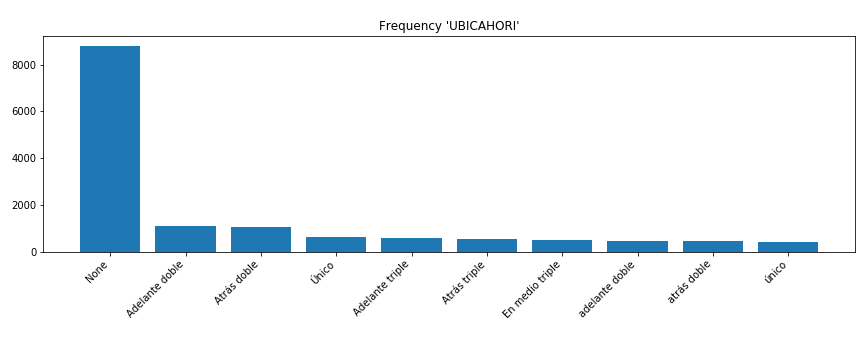
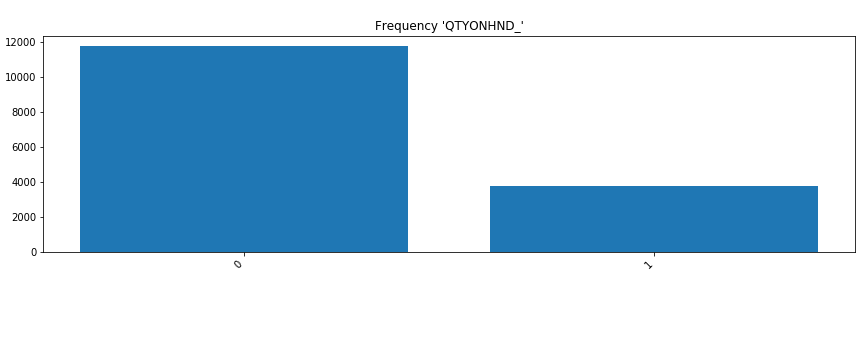
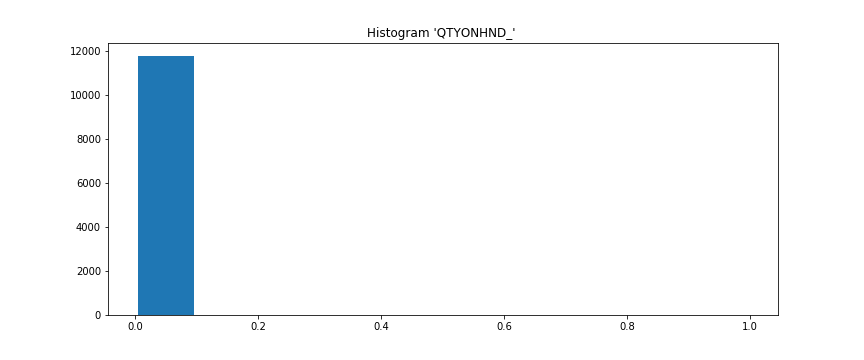
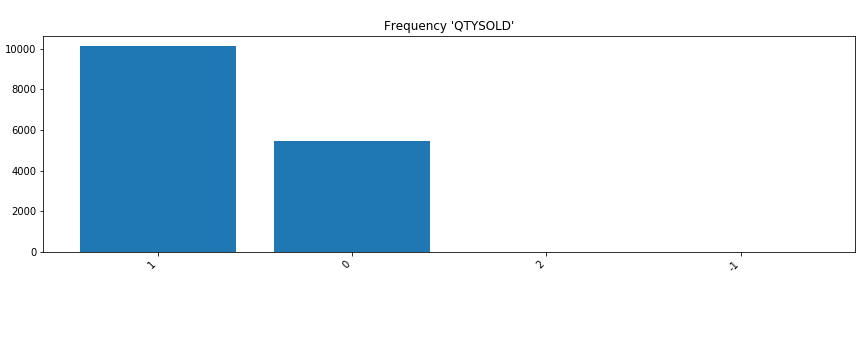
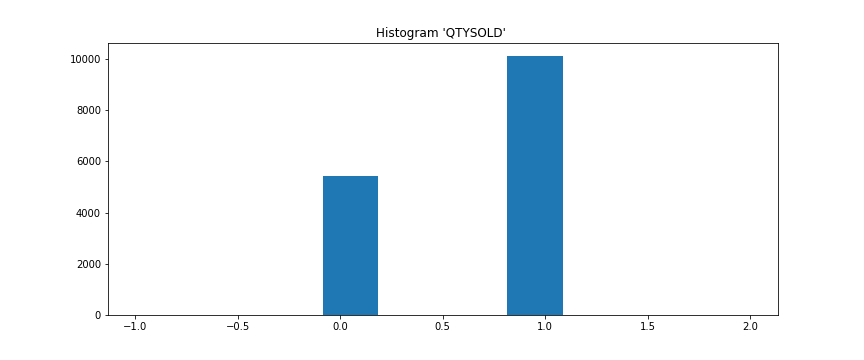
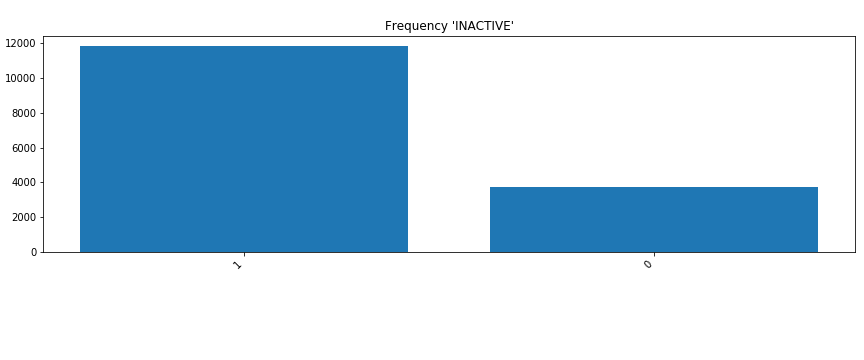
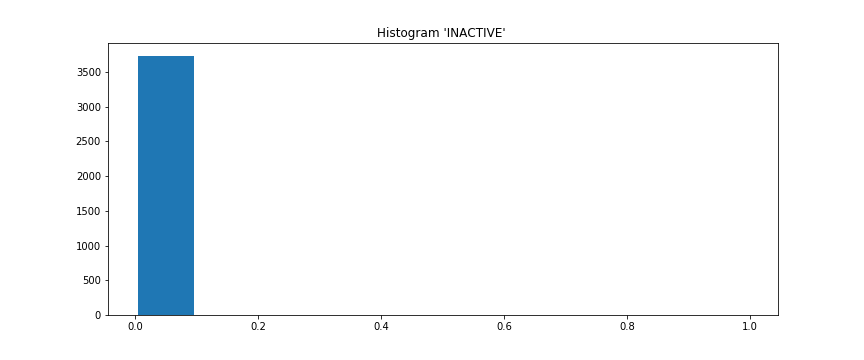
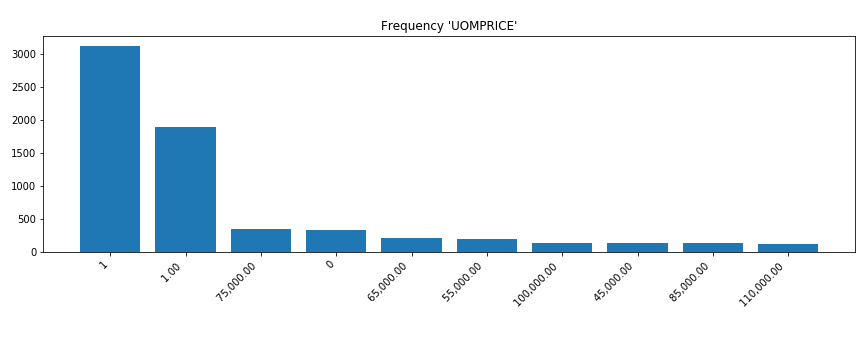
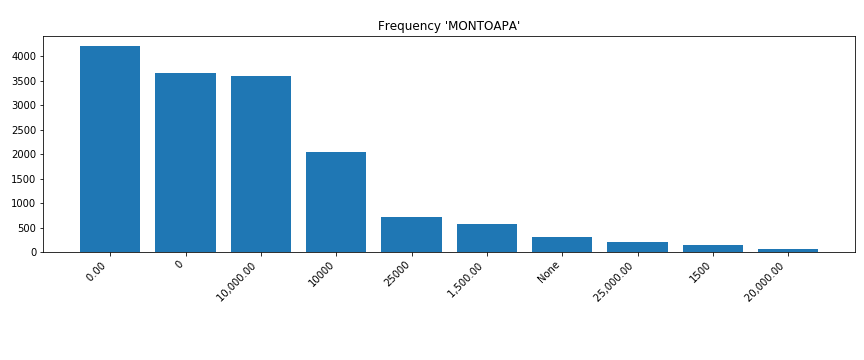
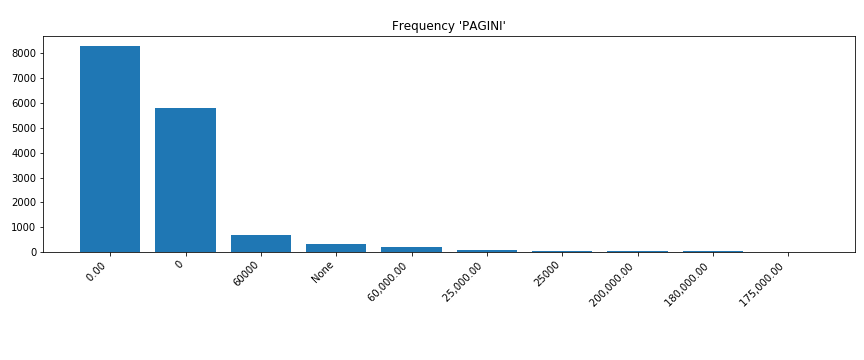
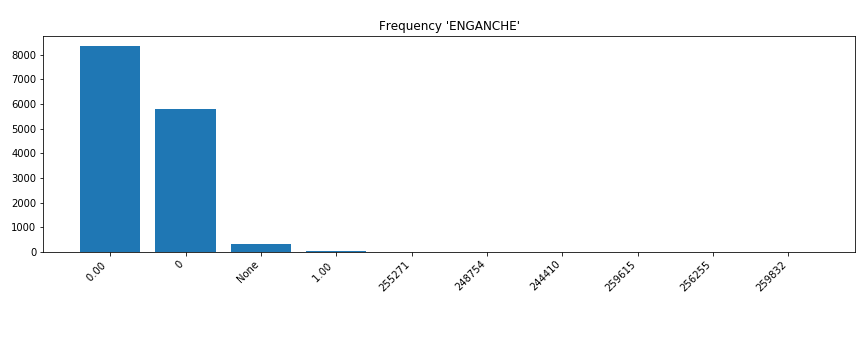
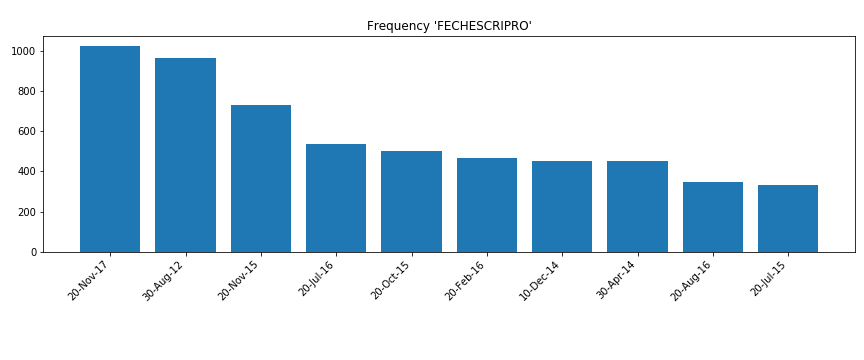
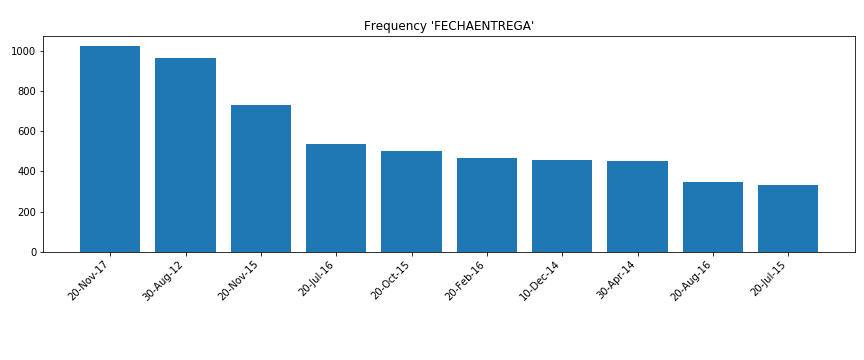
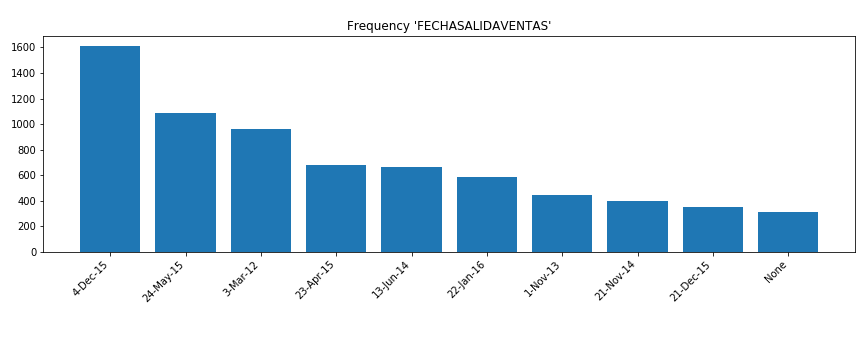
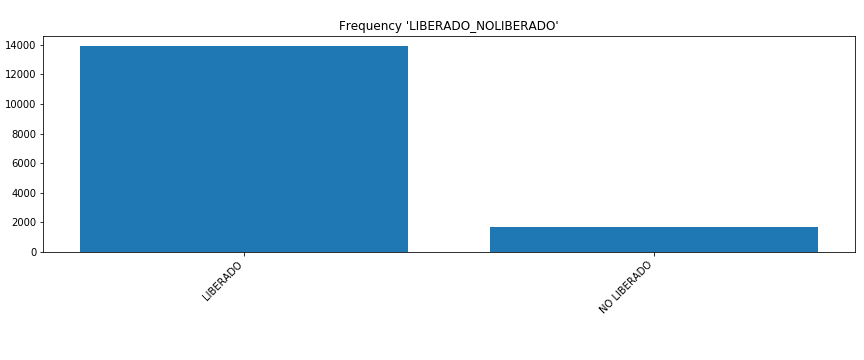
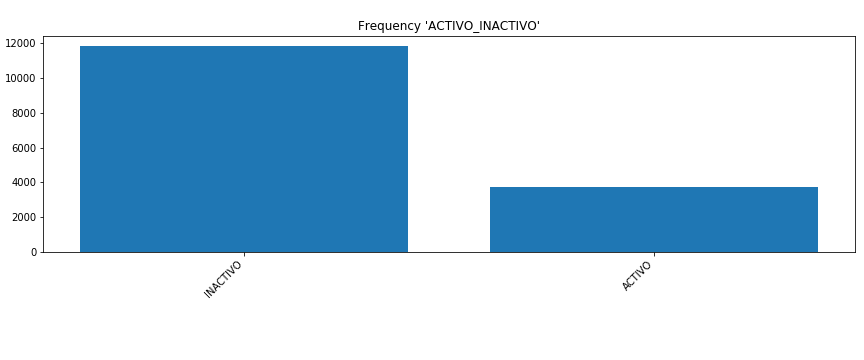
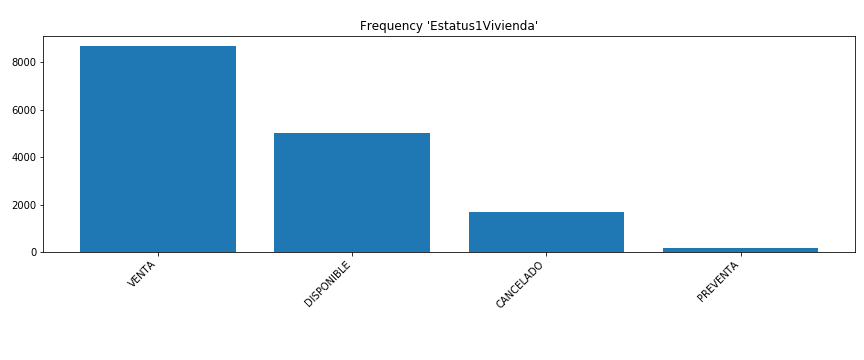
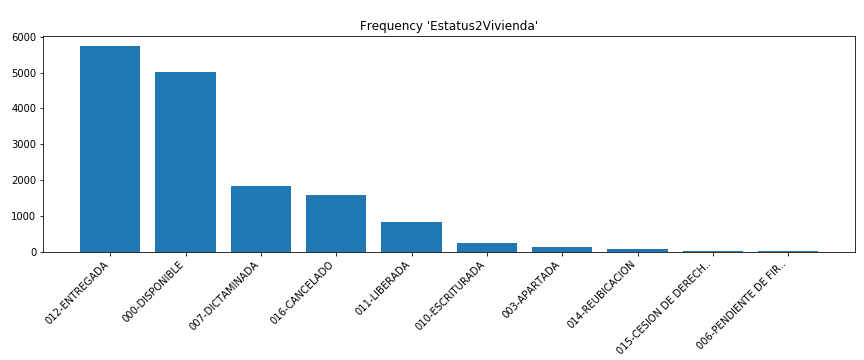
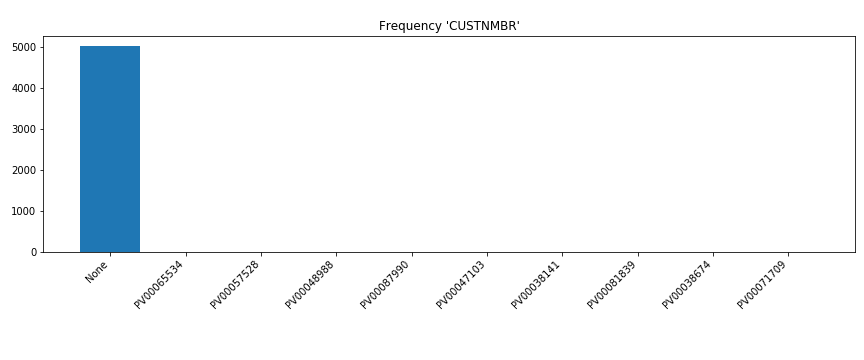
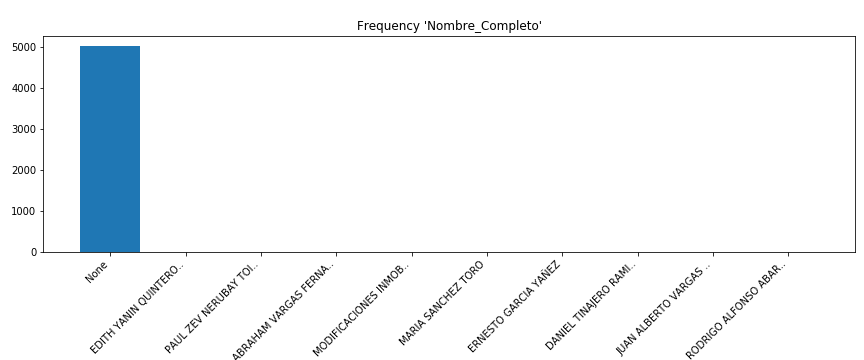
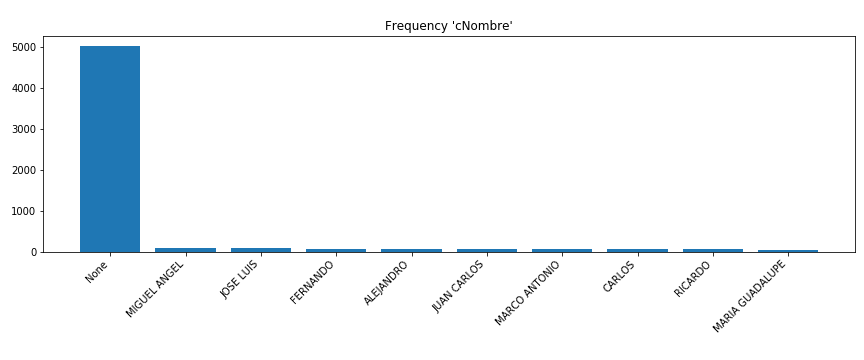
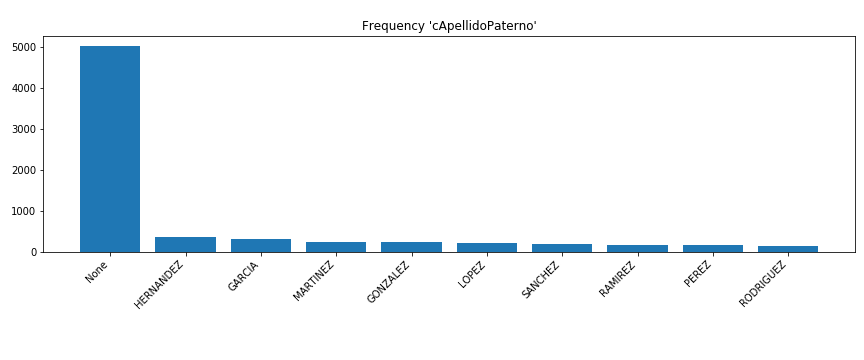
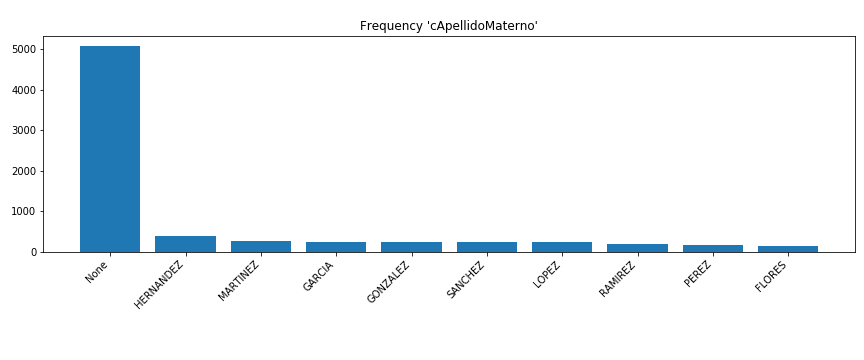
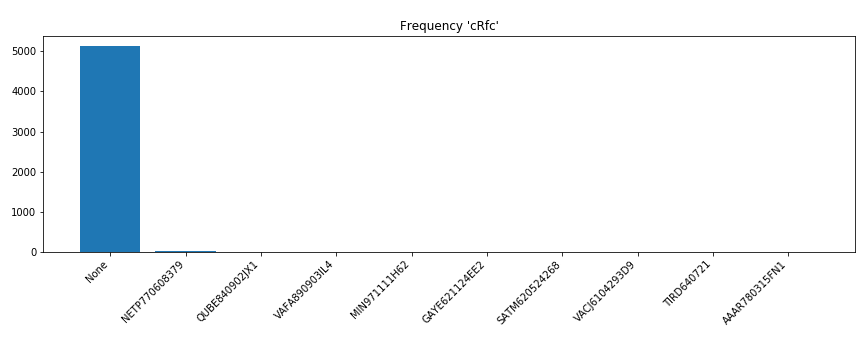
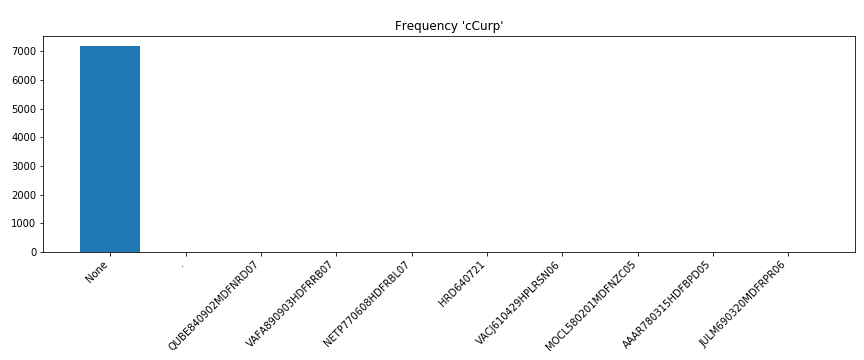
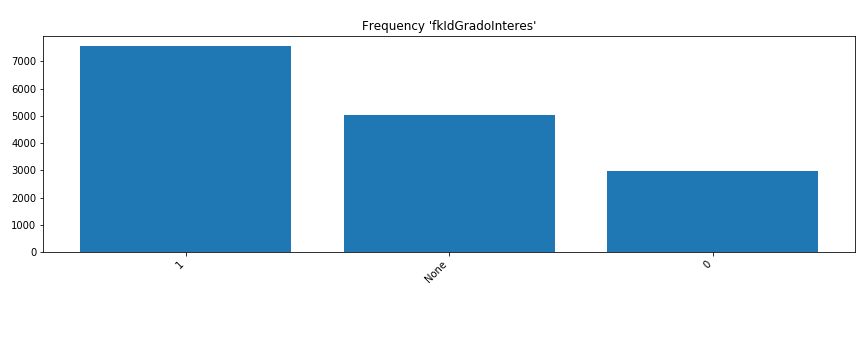
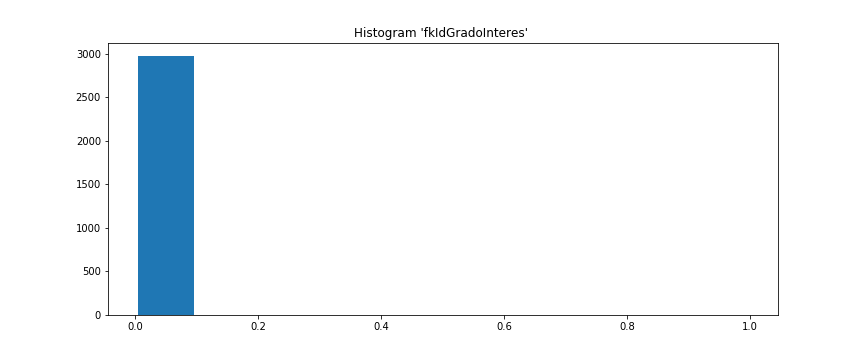
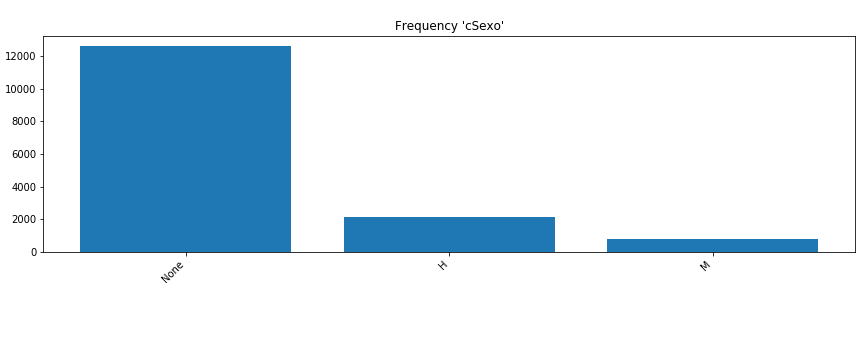
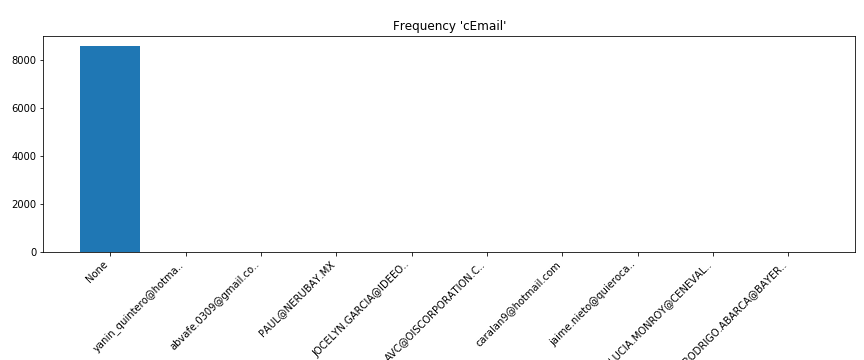
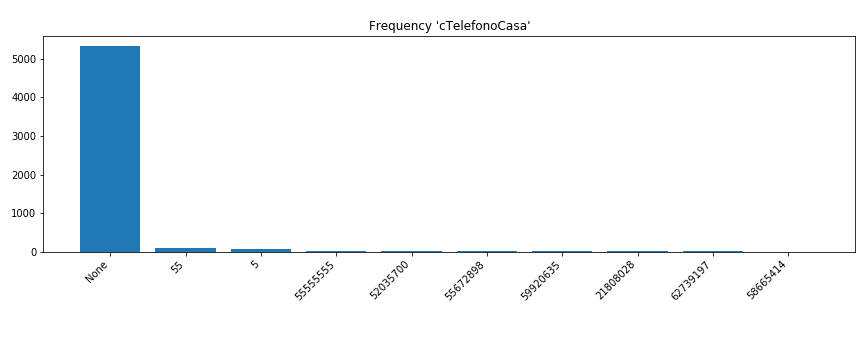
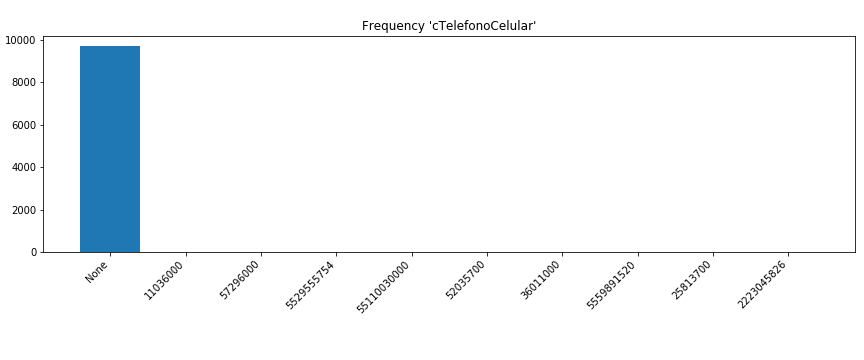
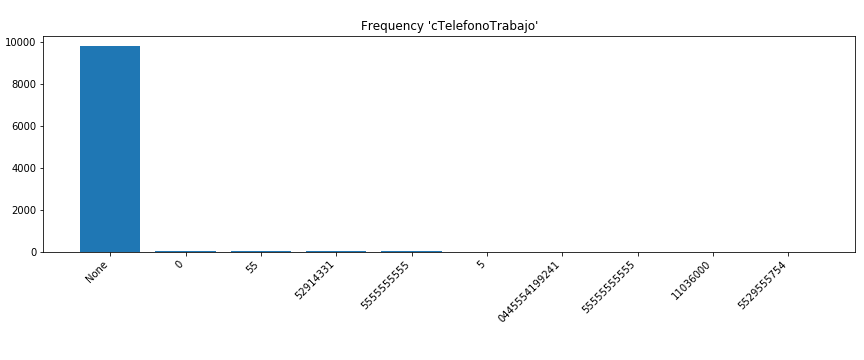
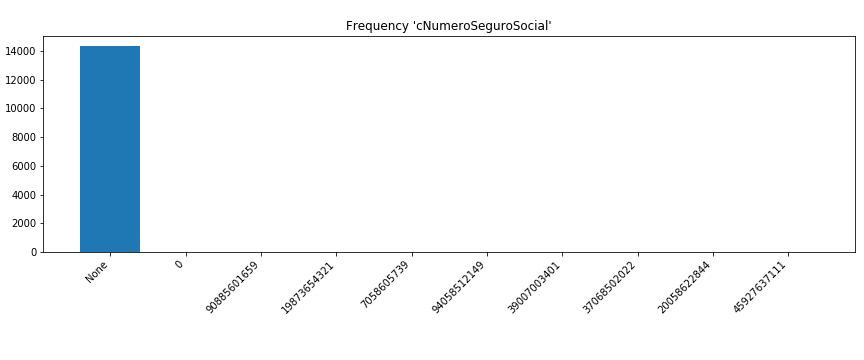
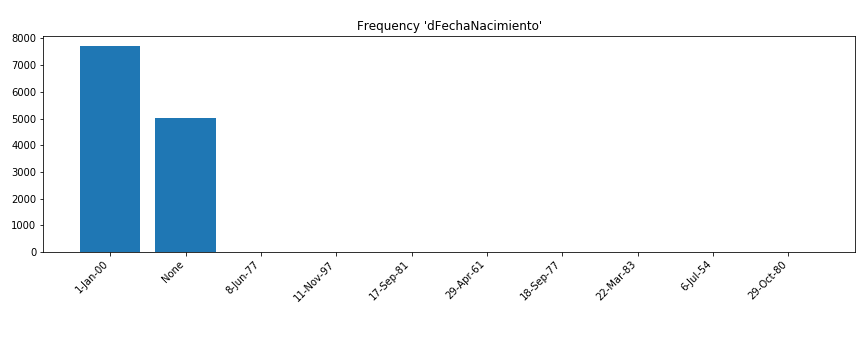
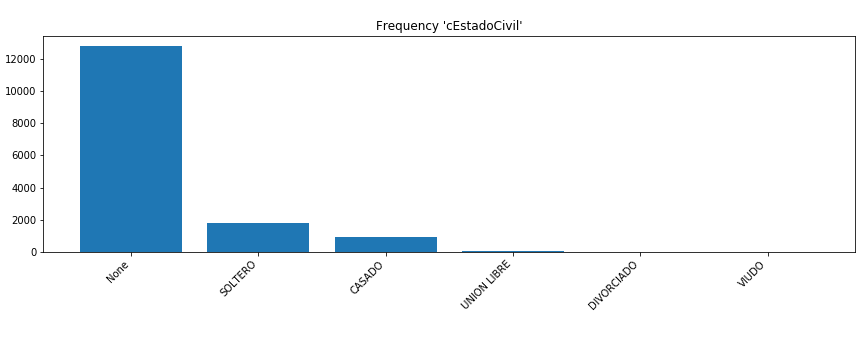
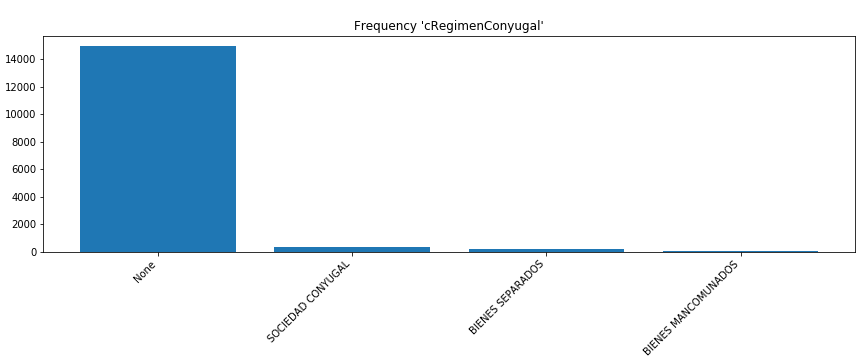
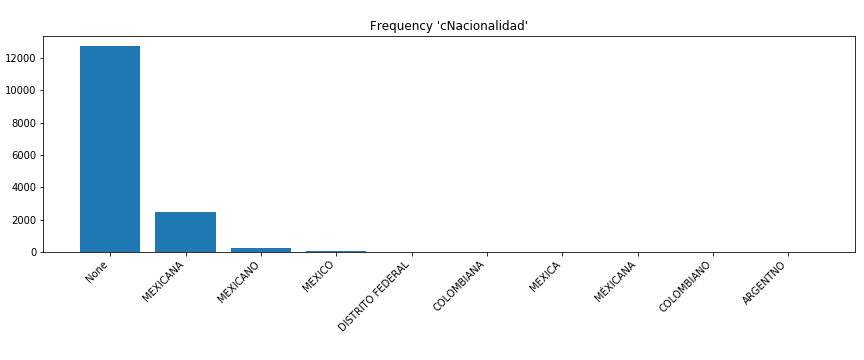
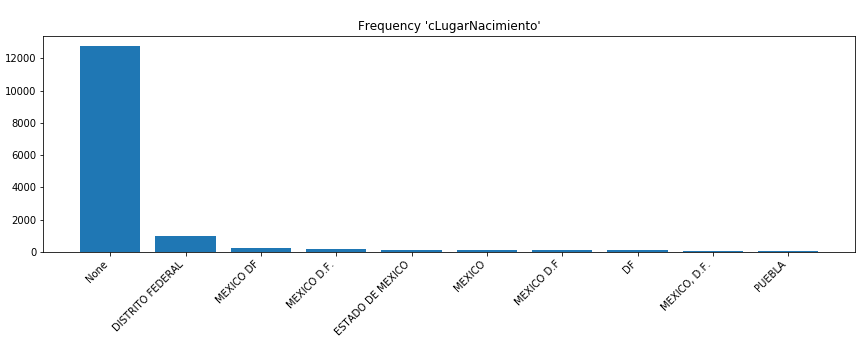
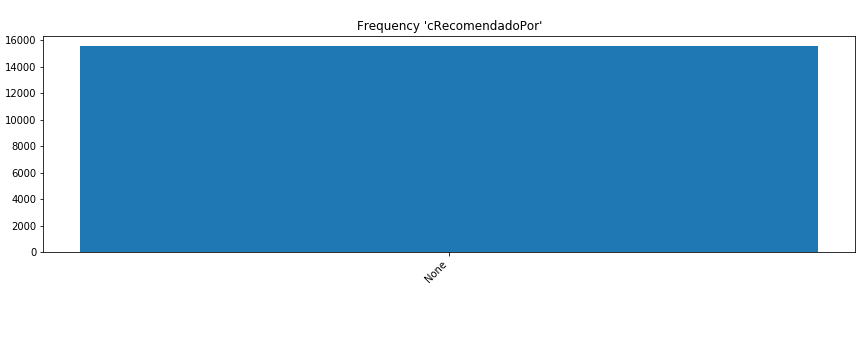
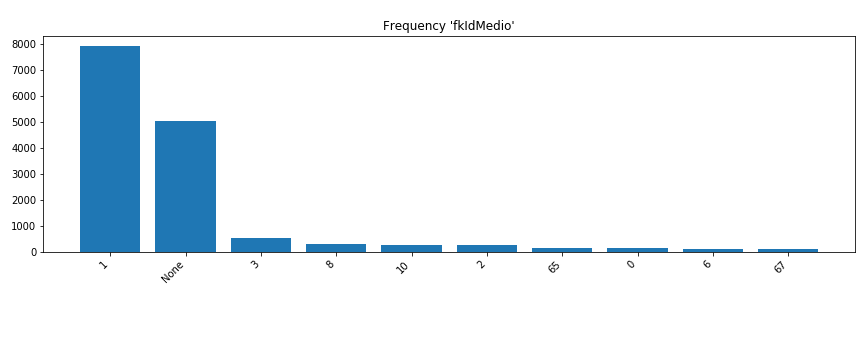
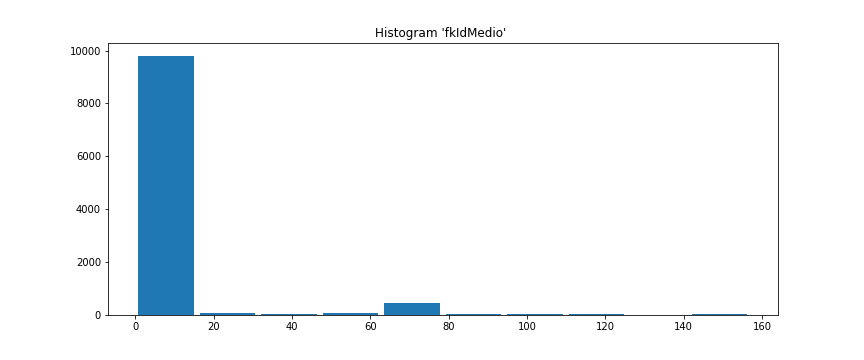
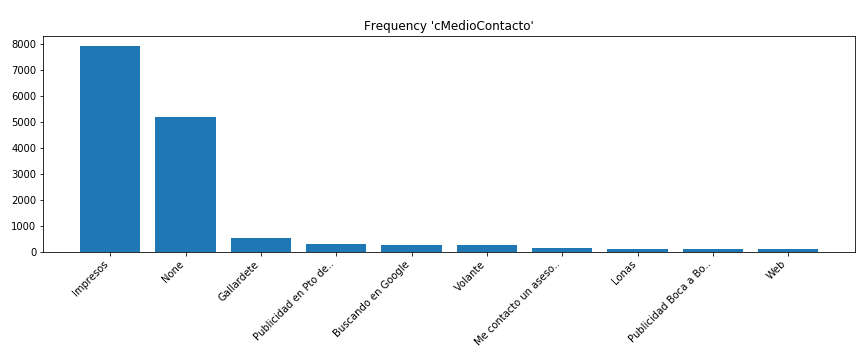
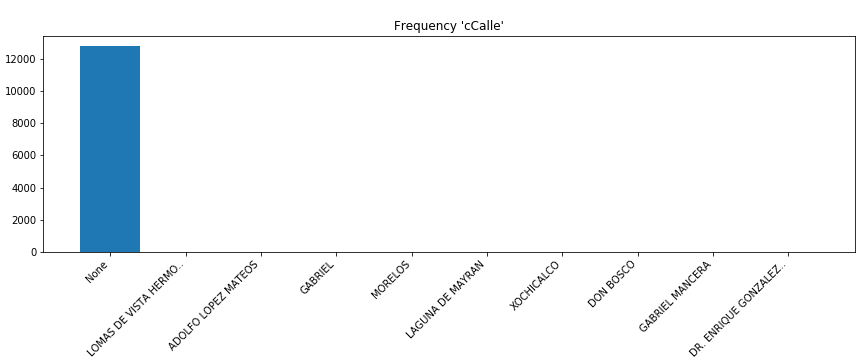
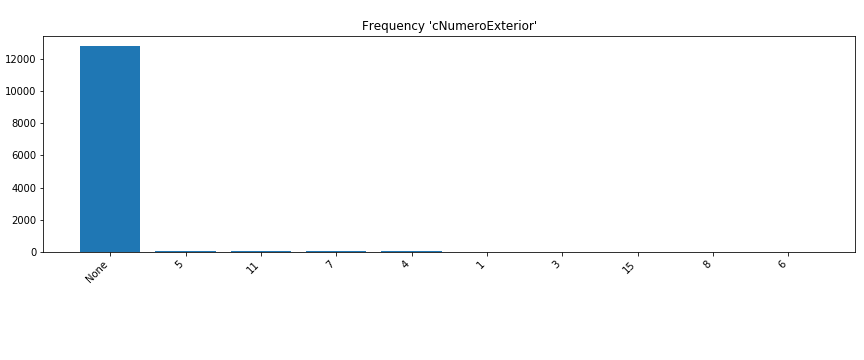
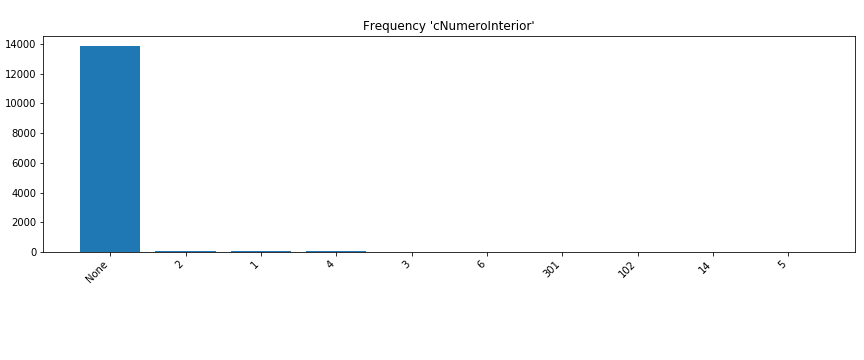
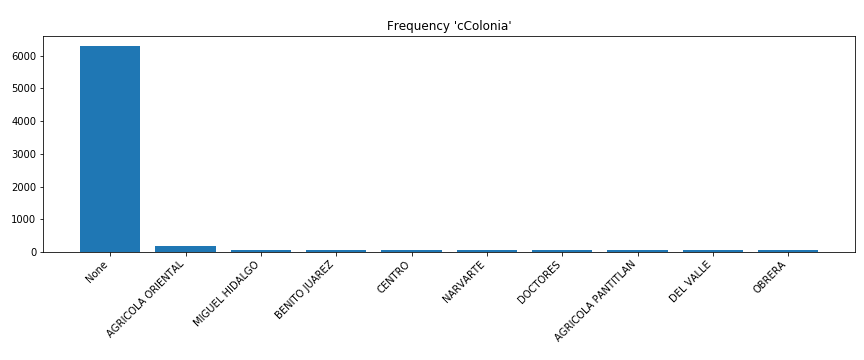
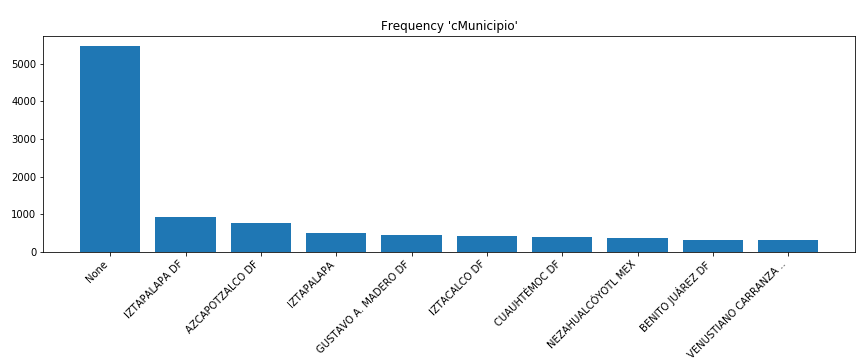
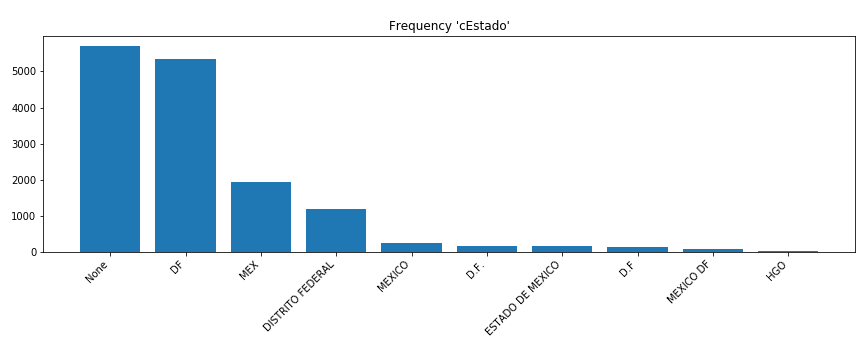
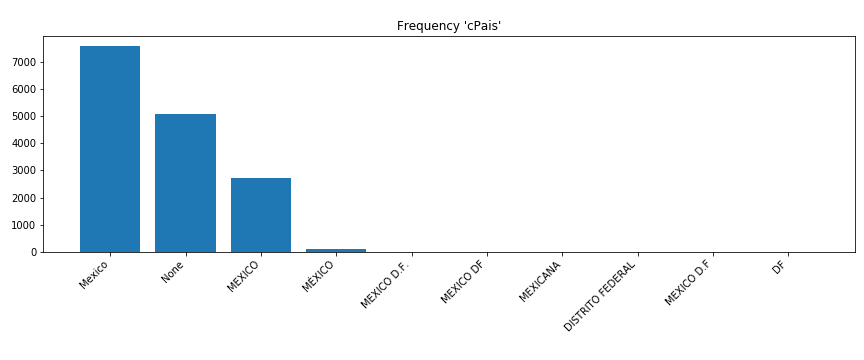
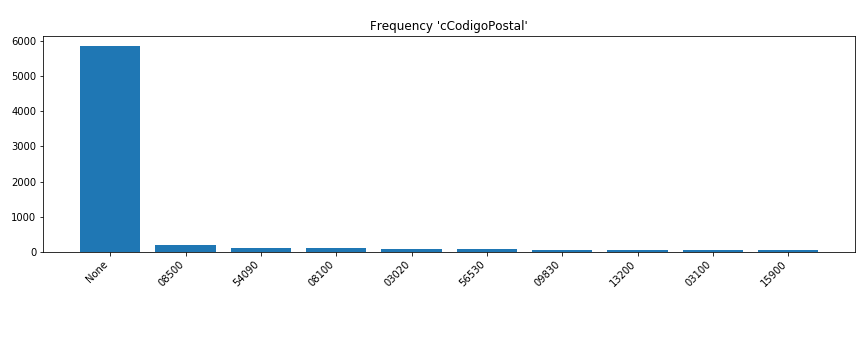
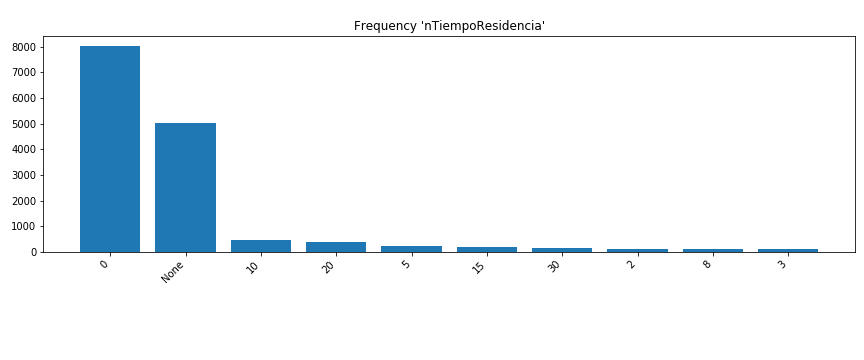
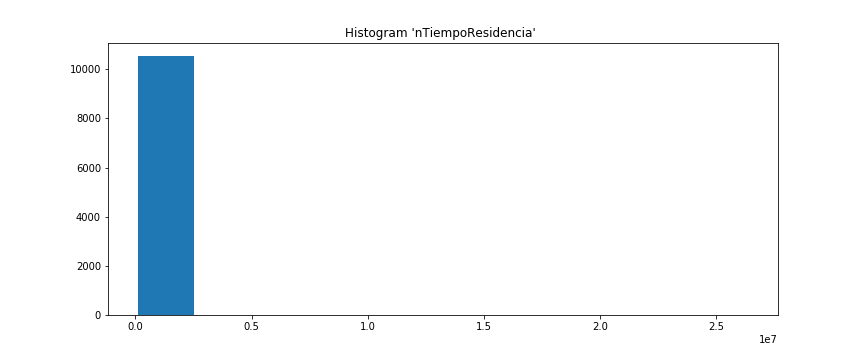
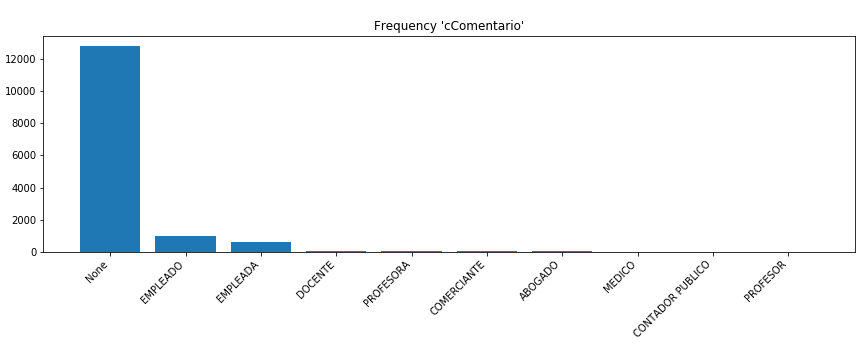
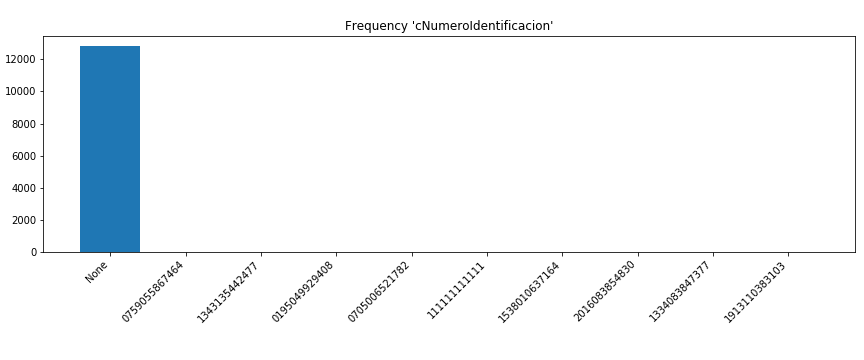
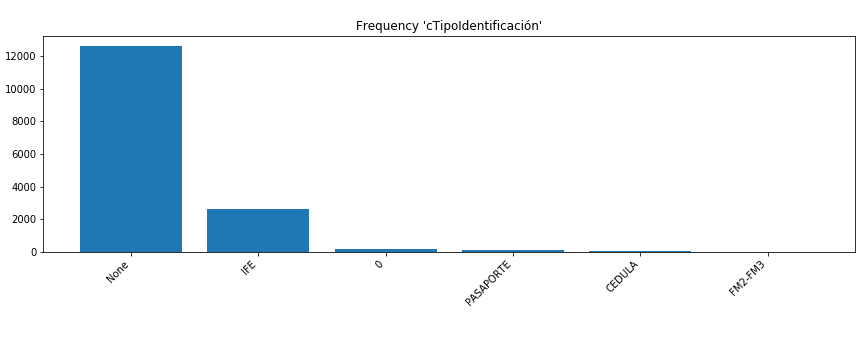
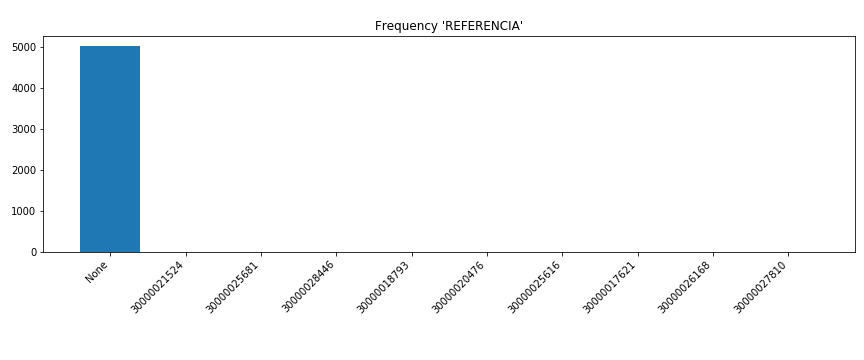
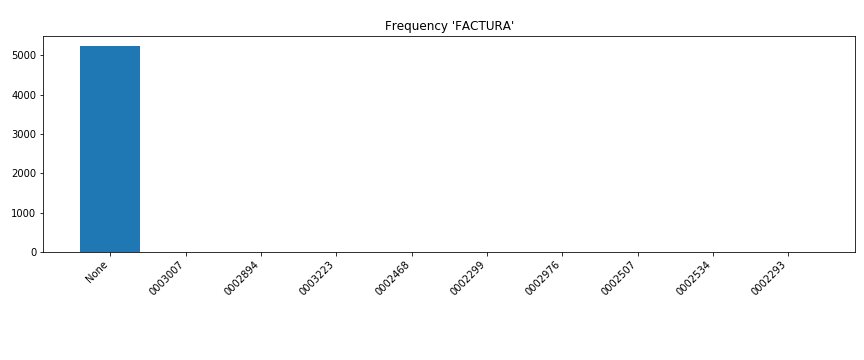
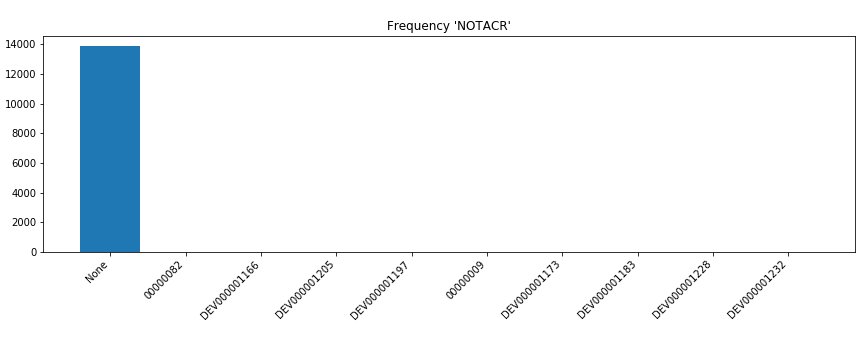
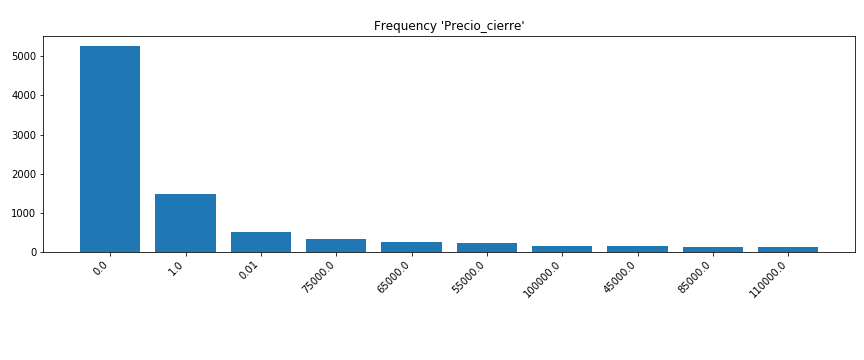
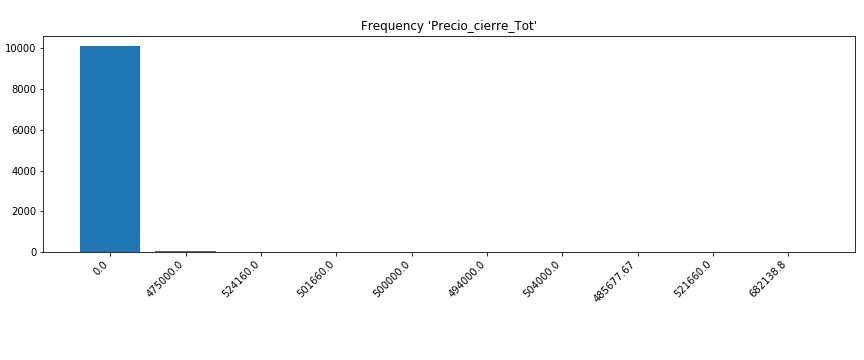
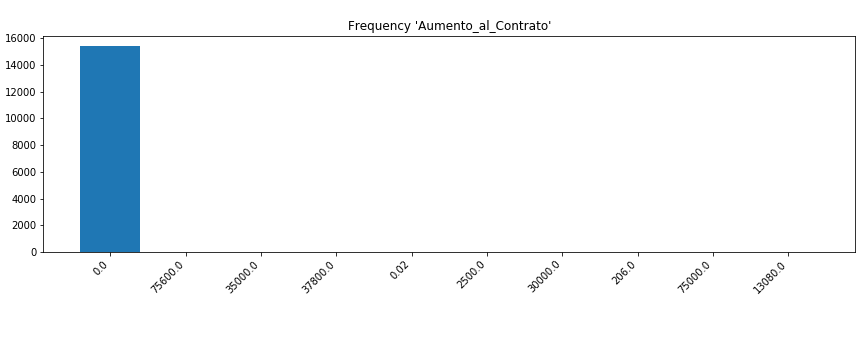
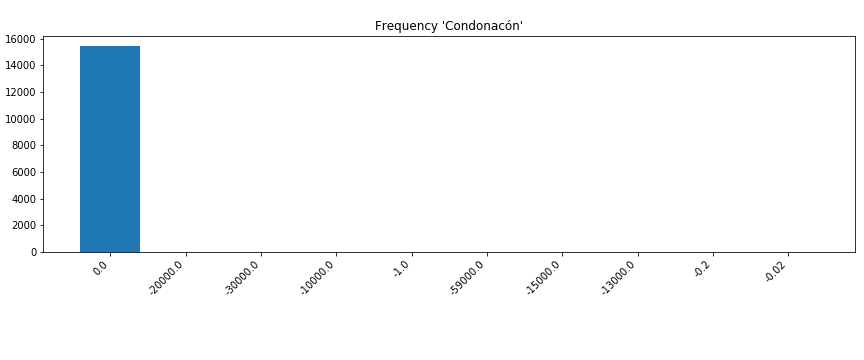
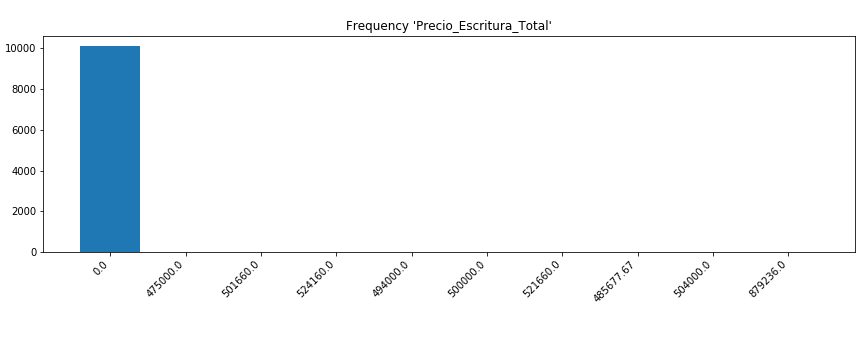
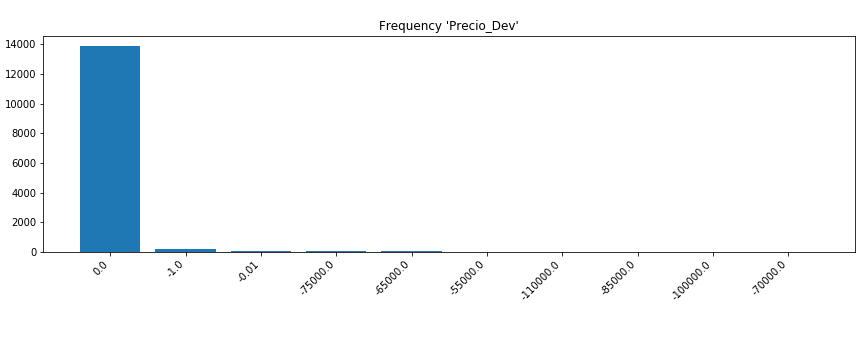
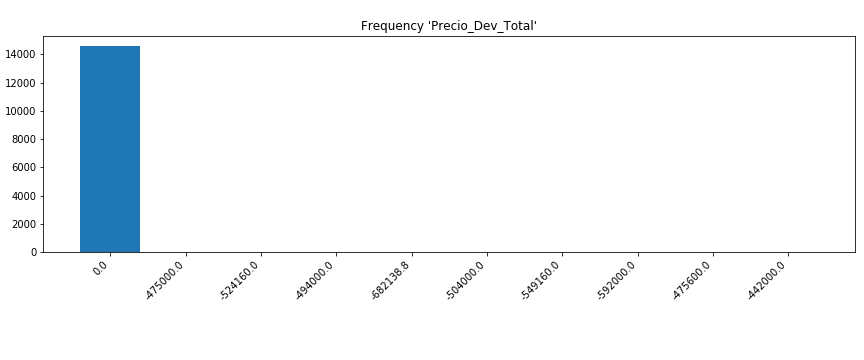
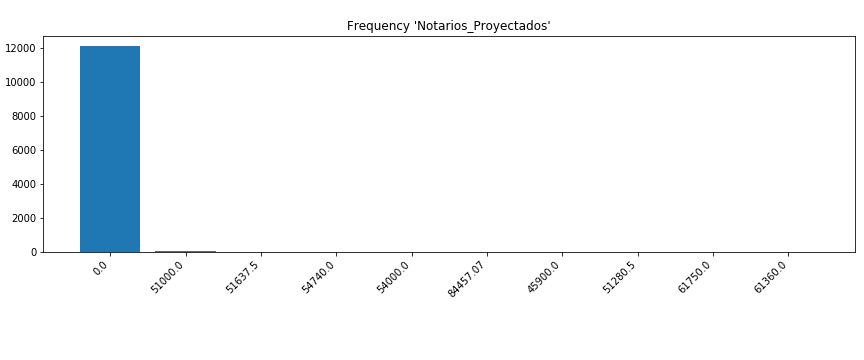
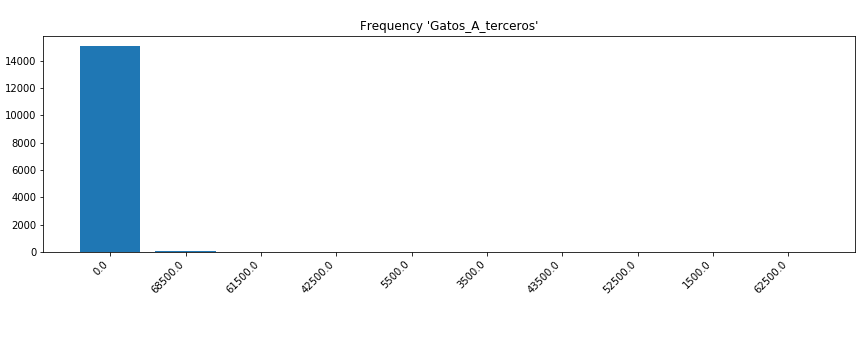
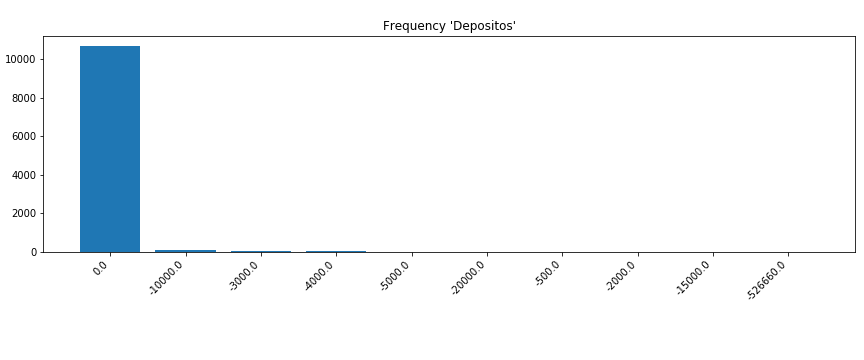
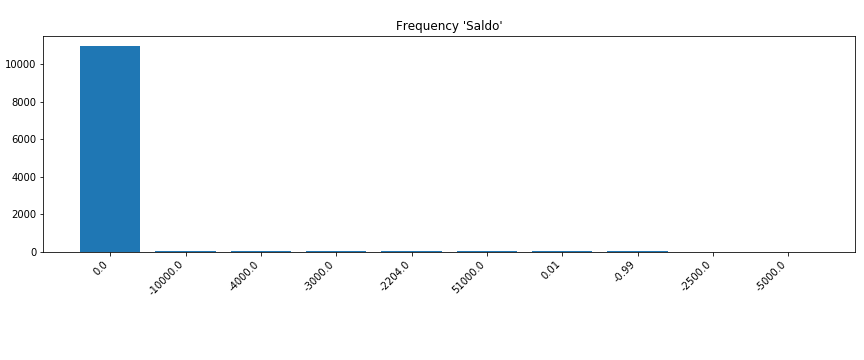
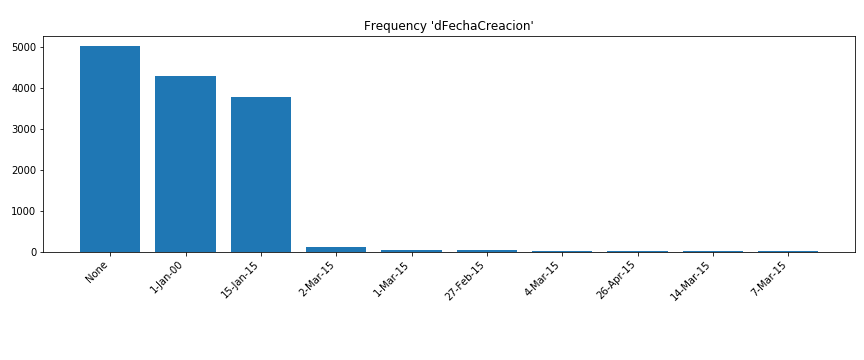
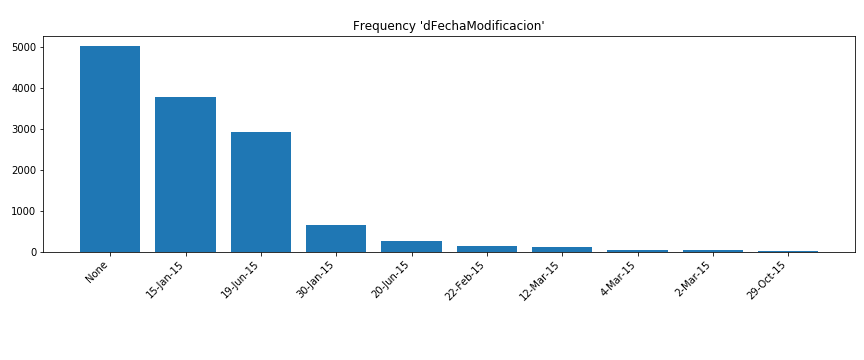
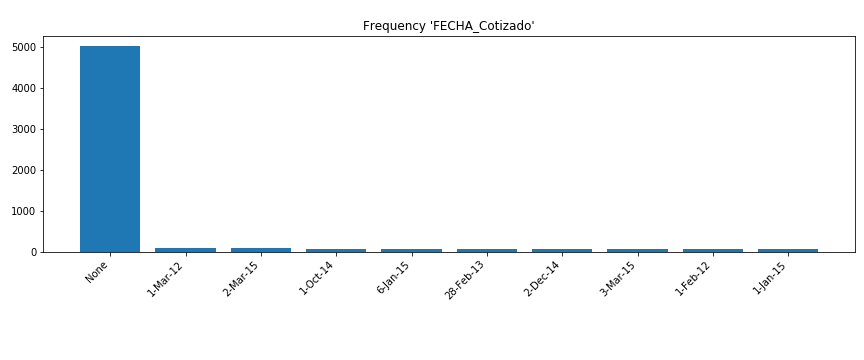
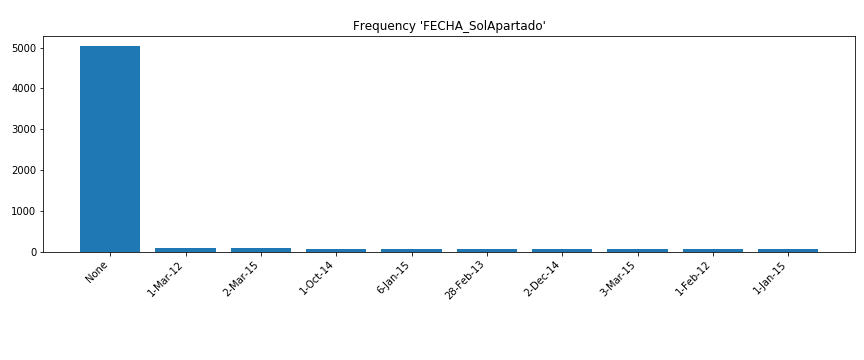
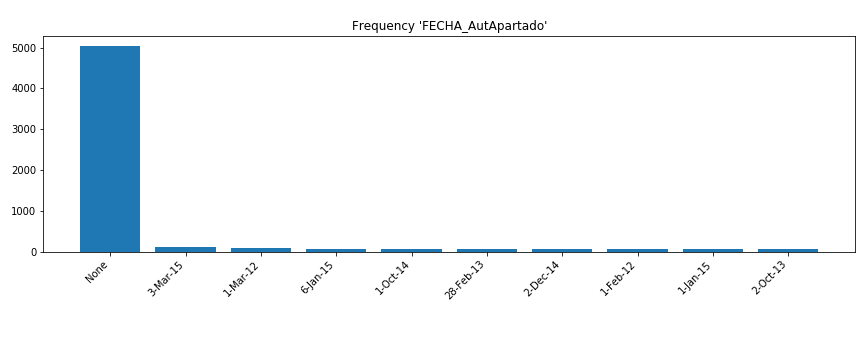
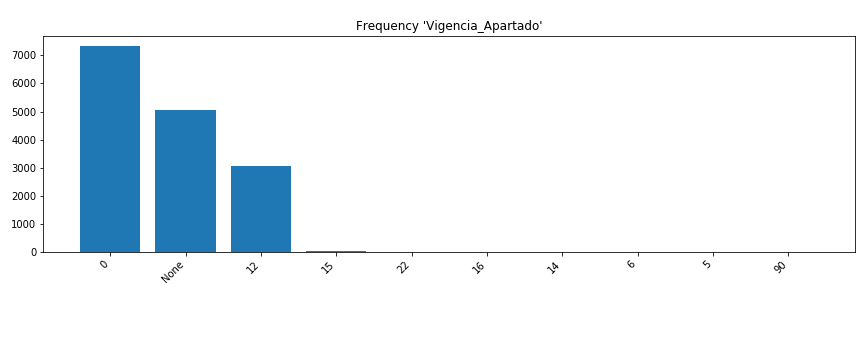
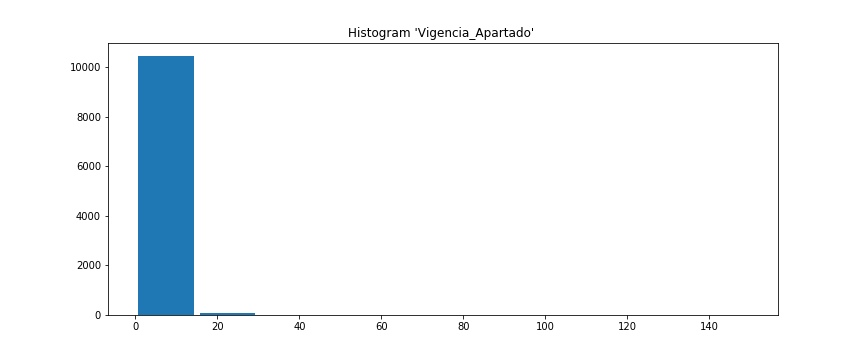
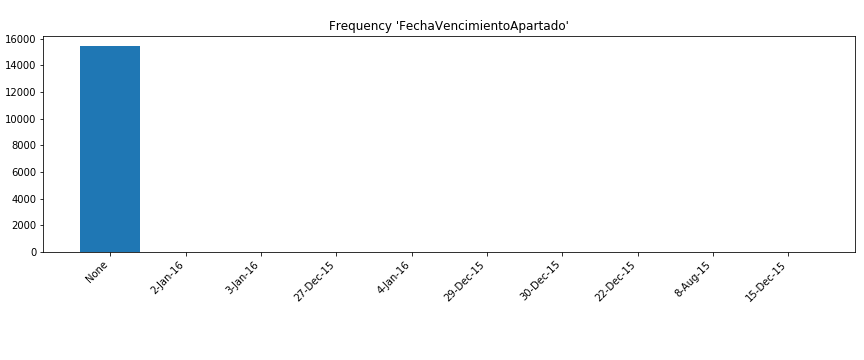
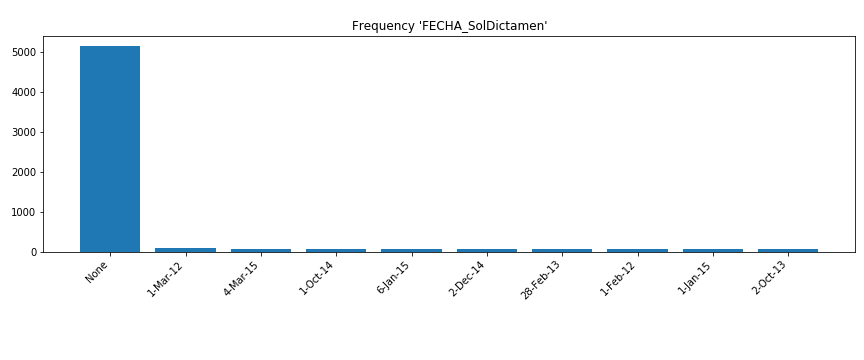
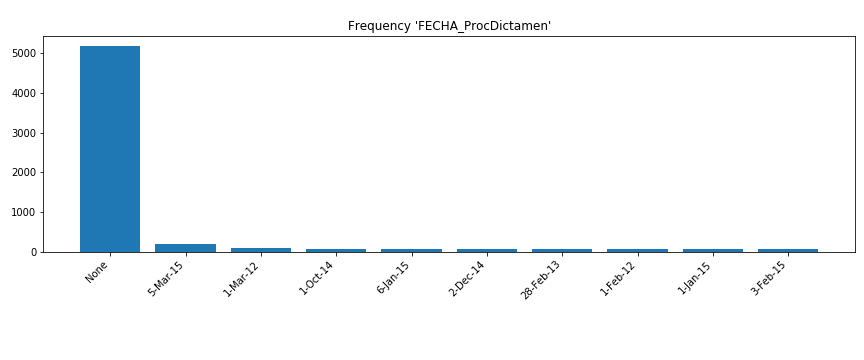
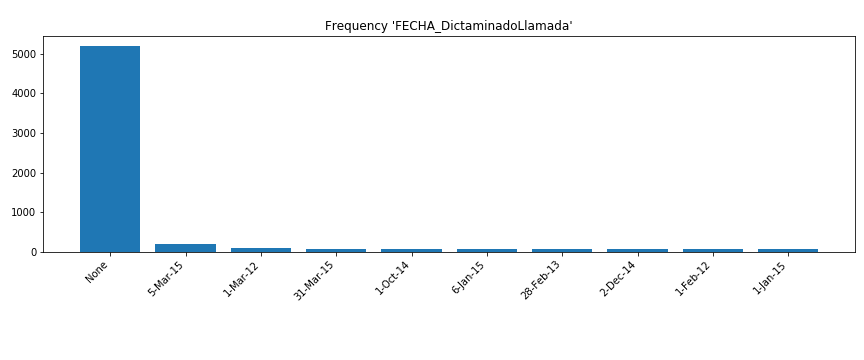
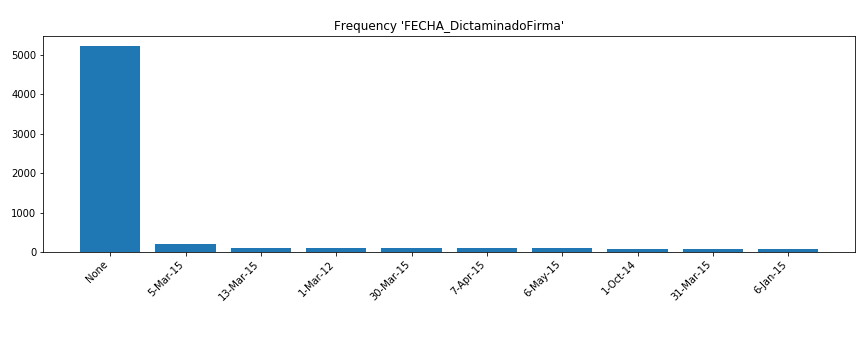
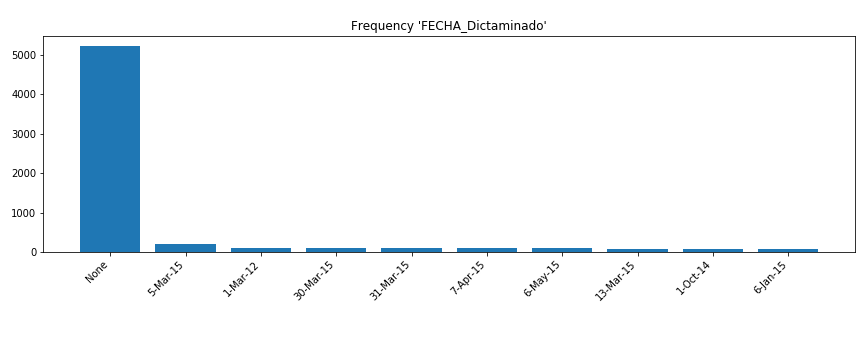
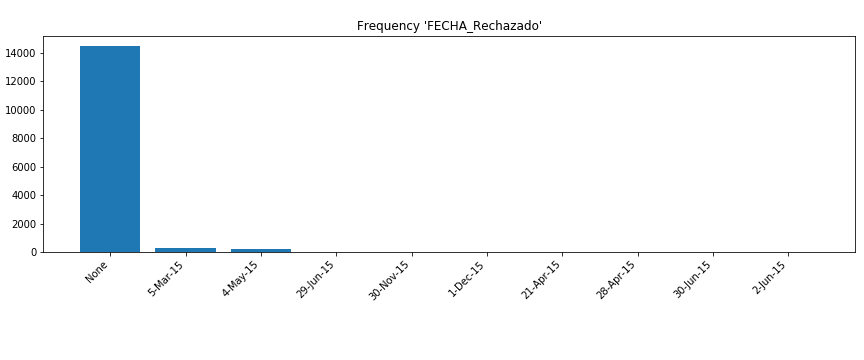
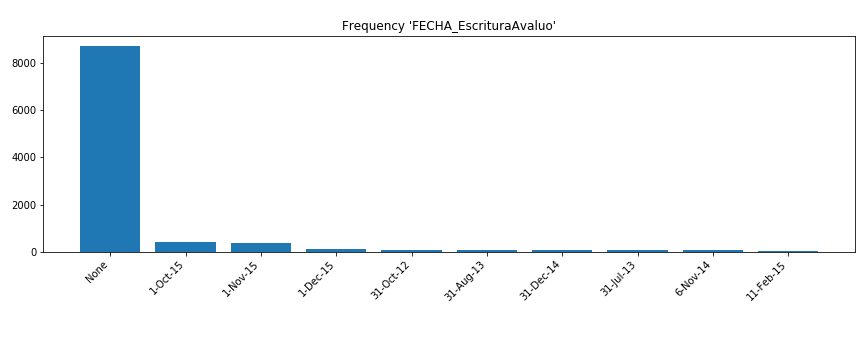
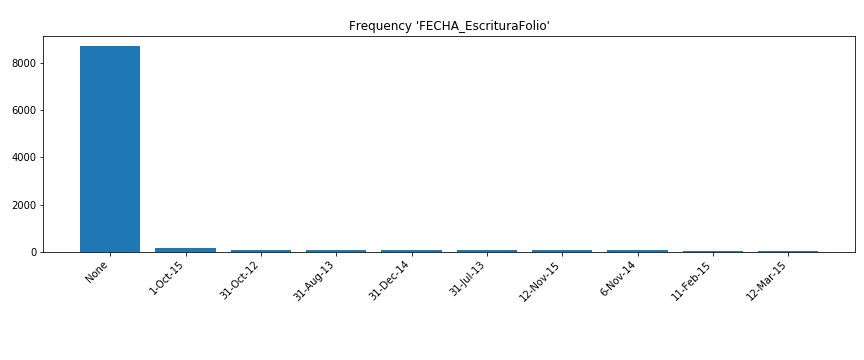
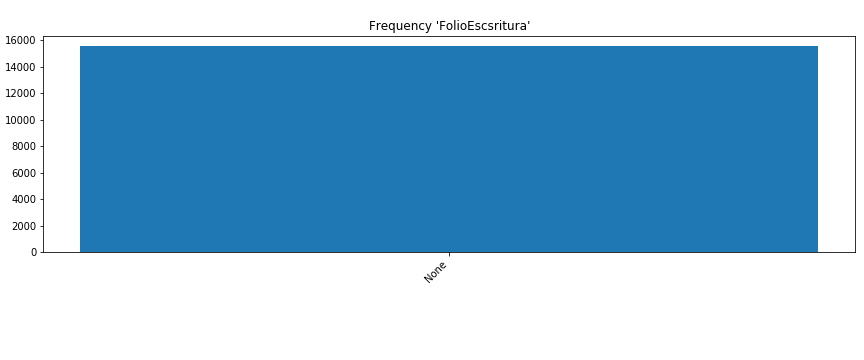
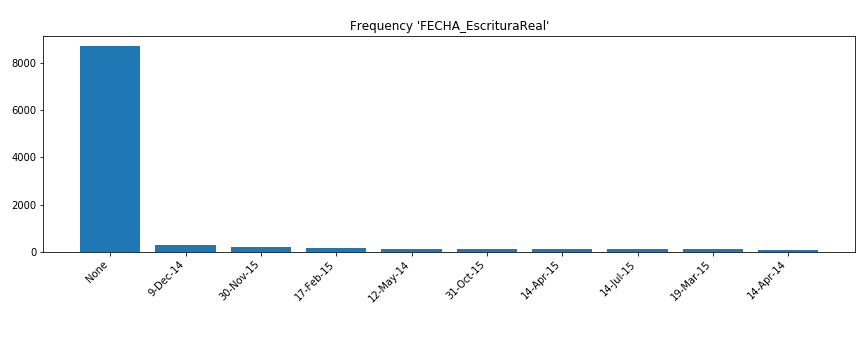
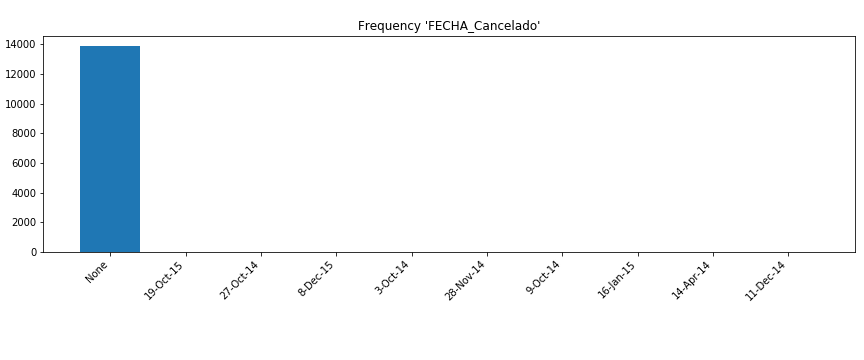
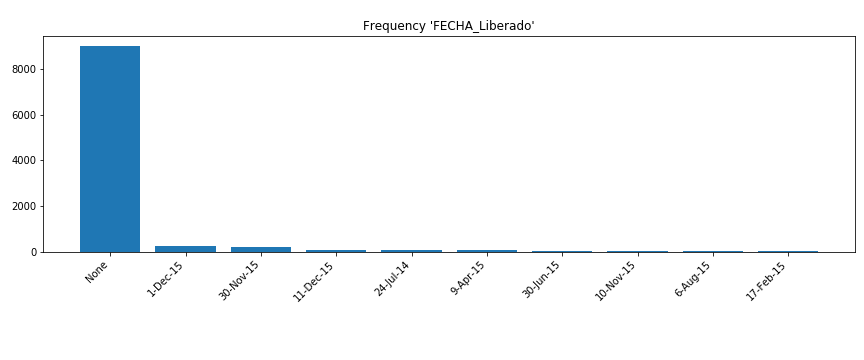
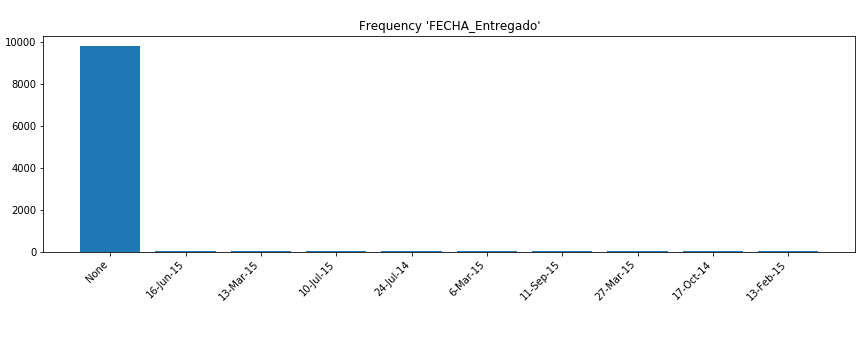
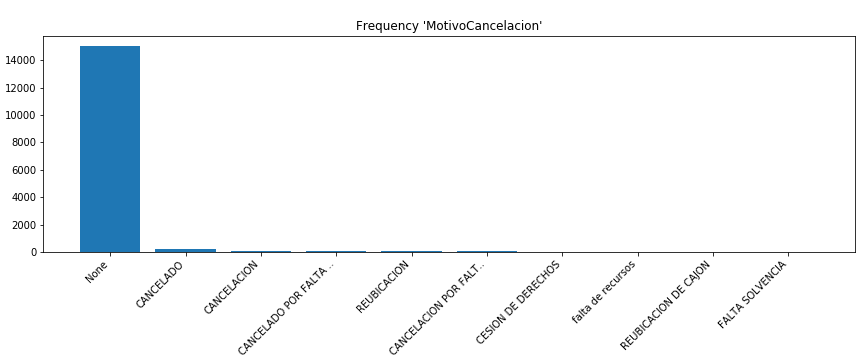

INFO:optimus:run() executed in 688.16 sec


Wall time: 11min 28s


In [26]:
%%time
from optimus.profiler.profiler import Profiler
p = Profiler()
p.run(df,"*",10)

In [23]:
df.cols.mad("ZIPCODE")

1180


0

In [20]:
df.debug()
LOCNCODE

(4) MapPartitionsRDD[989] at javaToPython at NativeMethodAccessorImpl.java:0 []
 |  MapPartitionsRDD[988] at javaToPython at NativeMethodAccessorImpl.java:0 []
 |  ShuffledRowRDD[987] at javaToPython at NativeMethodAccessorImpl.java:0 []
 +-(1) MapPartitionsRDD[986] at javaToPython at NativeMethodAccessorImpl.java:0 []
    |  MapPartitionsRDD[985] at javaToPython at NativeMethodAccessorImpl.java:0 []
    |  MapPartitionsRDD[984] at javaToPython at NativeMethodAccessorImpl.java:0 []
    |  FileScanRDD[983] at javaToPython at NativeMethodAccessorImpl.java:0 []


In [5]:
df = op.load.csv("data/Meteorite_Landings.csv").h_repartition()

INFO:optimus:Config.ini not found
INFO:optimus:Procesing General Stats...
INFO:optimus:general_stats() executed in 5.03 sec
INFO:optimus:cast_columns() executed in 0.0 sec
INFO:optimus:Processing Frequency ...



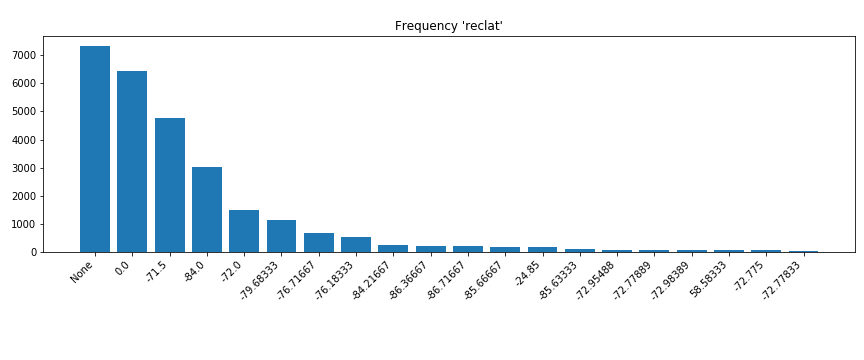

INFO:optimus:run() executed in 29.98 sec


In [8]:
from optimus.profiler.profiler import Profiler
p = Profiler()
p.run(df,"reclat")

In [71]:
df.cols.min(["id"])

min


1

In [80]:
df.cols.mad(["id","mass (g)"])

{'id': 0, 'mass (g)': 0.0}

In [74]:
df.cols.min(["id","name"])

min
min


{'id': 1, 'name': 'Aachen'}

In [81]:
df.cols.range(["id","mass (g)"])

{'id': {'max': 57458, 'min': 1}, 'mass (g)': {'max': 60000000.0, 'min': 0.0}}

In [55]:
d = {'id': {'range': {'max': 57458, 'min': 1}}}

In [56]:
def dict_depth(dic, level = 1): 
      
    if not isinstance(dic, dict) or not dic: 
        return level 
    return max(dict_depth(dic[key], level + 1) 
                               for key in dic) 
dict_depth(d)

4

In [63]:
df.cols.min(["id","mass (g)"])

{'id': {'min': 1}, 'mass (g)': {'min': 0.0}}


{'id': 1, 'mass (g)': 0.0}

In [62]:
df.cols.range("id")

{'range': {'max': 57458, 'min': 1}}


{'range': {'max': 57458, 'min': 1}}

In [65]:
print(a)

{'name': [{'count': 2.0, 'lower': 0.0, 'upper': 2.5}, {'count': 113.0, 'lower': 2.5, 'upper': 5.0}, {'count': 1074.0, 'lower': 5.0, 'upper': 7.5}, {'count': 1407.0, 'lower': 7.5, 'upper': 10.0}, {'count': 6588.0, 'lower': 10.0, 'upper': 12.5}, {'count': 5775.0, 'lower': 12.5, 'upper': 15.0}, {'count': 4226.0, 'lower': 15.0, 'upper': 17.5}, {'count': 4020.0, 'lower': 17.5, 'upper': 20.0}, {'count': 17134.0, 'lower': 20.0, 'upper': 22.5}, {'count': 1499.0, 'lower': 22.5, 'upper': 25.0}, {'count': 3824.0, 'lower': 25.0, 'upper': 27.5}, {'count': 54.0, 'lower': 27.5, 'upper': 30.0}, {'count': 0.0, 'lower': 30.0, 'upper': 32.5}, {'count': 0.0, 'lower': 32.5, 'upper': 35.0}, {'count': 0.0, 'lower': 35.0, 'upper': 37.5}, {'count': 0.0, 'lower': 37.5, 'upper': 40.0}, {'count': 0.0, 'lower': 40.0, 'upper': 42.5}, {'count': 0.0, 'lower': 42.5, 'upper': 45.0}, {'count': 0.0, 'lower': 45.0, 'upper': 47.5}, {'count': 0.0, 'lower': 47.5, 'upper': 50.0}], 'id': [{'count': 2505.0, 'lower': 1.0, 'upper

In [7]:
df.send("datasource 1")

INFO:optimus:Procesing General Stats...


Including 'nan' as Null in processing string type column 'name'
Including 'nan' as Null in processing string type column 'nametype'
Including 'nan' as Null in processing string type column 'recclass'
Including 'nan' as Null in processing string type column 'fall'
Including 'nan' as Null in processing string type column 'year'
Including 'nan' as Null in processing string type column 'GeoLocation'


INFO:optimus:general_stats() executed in 22.25 sec
INFO:optimus:Using 'column_exp' to process column 'name' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'id' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'nametype' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'recclass' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'fall' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'year' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'GeoLocation' with function _cast_to
INFO:optimus:cast_columns() executed in 0.12 sec
INFO:optimus:Processing Frequency ...


{"columns": {"name": {"stats": {"count_uniques": 45515, "min": "Aachen", "max": "\u015awi\u0119cany", "stddev": null, "kurtosis": null, "mean": null, "skewness": null, "sum": null, "variance": null, "zeros": 0, "count_na": 0, "hist": [{"count": 2.0, "lower": 0.0, "upper": 2.5}, {"count": 113.0, "lower": 2.5, "upper": 5.0}, {"count": 1074.0, "lower": 5.0, "upper": 7.5}, {"count": 1407.0, "lower": 7.5, "upper": 10.0}, {"count": 6588.0, "lower": 10.0, "upper": 12.5}, {"count": 5775.0, "lower": 12.5, "upper": 15.0}, {"count": 4226.0, "lower": 15.0, "upper": 17.5}, {"count": 4020.0, "lower": 17.5, "upper": 20.0}, {"count": 17134.0, "lower": 20.0, "upper": 22.5}, {"count": 1499.0, "lower": 22.5, "upper": 25.0}, {"count": 3824.0, "lower": 25.0, "upper": 27.5}, {"count": 54.0, "lower": 27.5, "upper": 30.0}, {"count": 0.0, "lower": 30.0, "upper": 32.5}, {"count": 0.0, "lower": 32.5, "upper": 35.0}, {"count": 0.0, "lower": 35.0, "upper": 37.5}, {"count": 0.0, "lower": 37.5, "upper": 40.0}, {"cou


gAAAAABdVJSZYACykenU3BtjRlX8JbCaMTxnlR9c3nCMDOoZg1e23344whPL3jQHJOPQYcbCbN8QCFdIjOWY_wVyMsls9pxGQEu_Rkuhl35TfVJ0-Z-A7orhJiAH19d4SBhReXVzam7drtOLT-2V9ZAUI05xnhDUPLSZ7pttwjVKMhIL4ALPui40jTyekxCnNXIRRK64oo3DzGmDzLBl---T7-W5Qxul6AduLFxv1d4vbeZDwVdGGriXAaPOibzpq3SmPyOs--od1vGAfmo-qABnXLUdRuFE2Sjd6eJDrz5EZz0EQ1S4aoUHm8kXuFJone0LC3v07G1P7uSB6AbPz1qo7RBttbV3YfUrYBkKk4G0YiD7VnjBJLsyY00_bXEmtEZkczNzaWIeQ_1j1WFYEGIusQZcEaTAigIwwhlaKzyUTt__LFJ9OTBEdi9ZsxnUbuzFdGRzgh4HuV7ZzAQOo9NRjUDEutpn5xLRR8P044aYZMfoxFFHkk_HQGoL2vvjBSBg8h7NziIUvaMBL3wh93EM8AIxVzArztxwwxNIE13a0aQYVxl3MEmimMaqCORRAd1INkjpihj7PLccQwkC90iu64upD9F3wfC3WW_C1xDlQYyreUzBVQbqHMA6QqoA3nAMhQbsspHQANMcRPh332srA956Y578KH0RtQCUncQSGIagewrG2yhHujle_x-10jB-HMYg4W_w35fdsHFWbPT5yGnmM3NR2-7khhqf7j2A_xPsLDIuXeOUNQShc3YFx8EVY8ufftyFFyFaqP88xqUG_Z3Z6RNgQ81YGC_oK_NTmJ4huSnpkS7utJYIKM7yw0fEkzyayeEYikKyvZe-vA0d1aLQOZUCUDExS7wpVFP9gJ5VX4vlUJ9SJ6-qoDQ27S-jyJQsseSeqfoBcCmxukfhplqnXPjrQFAwjlLbr367DMVEFvPPYCz8_rTlypYg5wkem1kE52t-ucEe4xDORs5b4bUp8HYZs4xrGtd

Data sent 



In [7]:
a = df.select(["name","id"])

In [8]:
a.send("datasource 2")

INFO:optimus:Procesing General Stats...


Including 'nan' as Null in processing string type column 'name'


INFO:optimus:general_stats() executed in 5.57 sec
INFO:optimus:Using 'column_exp' to process column 'name' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'id' with function _cast_to
INFO:optimus:cast_columns() executed in 0.03 sec
INFO:optimus:Processing Frequency ...


{"columns": {"name": {"stats": {"count_uniques": 45515, "min": "Aachen", "max": "\u015awi\u0119cany", "stddev": null, "kurtosis": null, "mean": null, "skewness": null, "sum": null, "variance": null, "zeros": 0, "count_na": 0, "hist": [{"count": 2.0, "lower": 0.0, "upper": 2.5}, {"count": 113.0, "lower": 2.5, "upper": 5.0}, {"count": 1074.0, "lower": 5.0, "upper": 7.5}, {"count": 1407.0, "lower": 7.5, "upper": 10.0}, {"count": 6588.0, "lower": 10.0, "upper": 12.5}, {"count": 5775.0, "lower": 12.5, "upper": 15.0}, {"count": 4226.0, "lower": 15.0, "upper": 17.5}, {"count": 4020.0, "lower": 17.5, "upper": 20.0}, {"count": 17134.0, "lower": 20.0, "upper": 22.5}, {"count": 1499.0, "lower": 22.5, "upper": 25.0}, {"count": 3824.0, "lower": 25.0, "upper": 27.5}, {"count": 54.0, "lower": 27.5, "upper": 30.0}, {"count": 0.0, "lower": 30.0, "upper": 32.5}, {"count": 0.0, "lower": 32.5, "upper": 35.0}, {"count": 0.0, "lower": 35.0, "upper": 37.5}, {"count": 0.0, "lower": 37.5, "upper": 40.0}, {"cou


gAAAAABdVJVHMtIcBTu_bYgIvRQFwSBAA4uiYonD-IWwr_BlR2ZSA6X0Q06DsugzKd3T39Rwp2trsg7FjTpebTBcOnr0V7lQ8-G3r9Pna-pD8Gk9BvMzkb3kIi0-ZVQopbyaiBeE-Ri7HoqN5qaV15R7rRzr-39GlFxYdTcsTV-8i8qOgaOnxU7E9Yj-HZ2S3SjVFYRADn1vCWgWtz1J4IPPIkHy6Is7p414HFtrVbucRlxYI7nHTq8zh4fFMMfaG0NlToEKA4KOfAsauEmLh182ba5UDWI7uRWiM55ZLFSCNfIv-7cOkD7FJdDCpc2drk61n1wtAzhcvhlSJZLVomPF7x08wRkX9_rp7YM45VXlmVNyhtRsaq889wNyASWnzMKmzxwewpgfbhPYZgZlAK3AQvivcKK_FzNAJBJlXVgBWCp-BjCAiB39GDsceGML8KlxV29Wib13B7ytItRnIaGbWfzDm3p61UERH18M21kA24J_unBpQf4fDe-y4WUJtmuknVqCQaPUV5FINUrvm6nWCiQl-Ut47iDZmCEARUn6rjpZsWY3f6RmsYFJtBNorkuxZMLpMGaP4GmrZg8r4gTnm-TwCW3e-V7NjjvaT1DY4Y-LJ_Njw02pReH7bO-A30JPEH8eEIQkVbOw3DKS8q_eOxtRgUBvGSAbmgRL6Mz3DSvmXzAqJbB5Gs6tCIXR6fQlXQhhteNHJx3ra9Owz3TDmYeqsXNzasGaL0SyhgLU1L0UtlZoJprZ7Pur-00sFkxPw2Bil_mu8Wq4XcM9K23gRMQ3V84iBZ1-CLH42Ml6AuxCXAW1A70iyF2kSLAmY8SWTr3uEVaC_obNKPYkvQ50_7LBQ1d7wrTsHbHGOetPuA-cKSqAsbpeuIRGxmrg-O-t_62e85GDEx4_PssM5K7uicxKJMUgmG3-qHNQFlt_nUTf-3qCT-v2kKHGD1m2KSm32MsFrjm-pANP91e88tOc5KdpC6Z_zyrEOFX

Data sent 



In [5]:
import pandas as pd
from pyspark.sql.types import *
from datetime import date, datetime

df = op.create.df(
    [
        ("names", "str", True), 
        ("height(ft)","int", True), 
        ("function", "str", True), 
        ("rank", "int", True), 
        ("age","int",True),
        ("weight(t)","float",True),
        ("japanese name", ArrayType(StringType()), True),
        ("last position seen", "str", True),
        ("date arrival", "str", True),
        ("last date seen", "str", True),
        ("attributes", ArrayType(FloatType()), True),
        ("DateType"),
        ("Tiemstamp"),
        ("Cybertronian", "bool", True), 
        ("function(binary)","binary", False),
        ("NullType", "null", True),

    ],
    [
        ("Optim'us", 28, "Leader", 10, 5000000, 4.30, ["Inochi", "Convoy"], "19.442735,-99.201111", "1980/04/10",
         "2016/09/10", [8.5344, 4300.0], date(2016, 9, 10), datetime(2014, 6, 24), True, bytearray("Leader", "utf-8"),
         None),
        ("bumbl#ebéé  ", 17, "Espionage", 7, 5000000, 2.0, ["Bumble", "Goldback"], "10.642707,-71.612534", "1980/04/10",
         "2015/08/10", [5.334, 2000.0], date(2015, 8, 10), datetime(2014, 6, 24), True, bytearray("Espionage", "utf-8"),
         None),
        ("ironhide&", 26, "Security", 7, 5000000, 4.0, ["Roadbuster"], "37.789563,-122.400356", "1980/04/10",
         "2014/07/10", [7.9248, 4000.0], date(2014, 6, 24), datetime(2014, 6, 24), True, bytearray("Security", "utf-8"),
         None),
        ("Jazz", 13, "First Lieutenant", 8, 5000000, 1.80, ["Meister"], "33.670666,-117.841553", "1980/04/10",
         "2013/06/10", [3.9624, 1800.0], date(2013, 6, 24), datetime(2014, 6, 24), True,
         bytearray("First Lieutenant", "utf-8"), None),
        ("Megatron", None, "None", 10, 5000000, 5.70, ["Megatron"], None, "1980/04/10", "2012/05/10", [None, 5700.0],
         date(2012, 5, 10), datetime(2014, 6, 24), True, bytearray("None", "utf-8"), None),
        ("Metroplex_)^$", 300, "Battle Station", 8, 5000000, None, ["Metroflex"], None, "1980/04/10", "2011/04/10",
         [91.44, None], date(2011, 4, 10), datetime(2014, 6, 24), True, bytearray("Battle Station", "utf-8"), None),
        ("1", 2, "3", 4, 5, 6.0, ["7"], 8, "1980/04/10", "2011/04/10",
         [11.0], date(2011, 4, 10), datetime(2014, 6, 24), True, bytearray("15", "utf-8"), None)
    ], infer_schema = True).h_repartition(1)
df.table()

In [ ]:
from optimus.profiler.profiler import Profiler
p = Profiler()
p.run(df,"names")

In [23]:
df.cols.hist("names", 10)

INFO:optimus:hist() executed in 1.33 sec


[{'count': 2.0, 'lower': 0.0, 'upper': 5.0},
 {'count': 3.0, 'lower': 5.0, 'upper': 10.0},
 {'count': 2.0, 'lower': 10.0, 'upper': 15.0},
 {'count': 0.0, 'lower': 15.0, 'upper': 20.0},
 {'count': 0.0, 'lower': 20.0, 'upper': 25.0},
 {'count': 0.0, 'lower': 25.0, 'upper': 30.0},
 {'count': 0.0, 'lower': 30.0, 'upper': 35.0},
 {'count': 0.0, 'lower': 35.0, 'upper': 40.0},
 {'count': 0.0, 'lower': 40.0, 'upper': 45.0},
 {'count': 0.0, 'lower': 45.0, 'upper': 50.0}]

In [33]:
print(freq)

{'height(ft)': [{'value': 28, 'count': 1}, {'value': 17, 'count': 1}, {'value': 26, 'count': 1}, {'value': 13, 'count': 1}, {'value': None, 'count': 1}, {'value': 300, 'count': 1}, {'value': 2, 'count': 1}]}


In [ ]:
[["a"],["b"]]

In [48]:
df.send("datasource 1")

AttributeError: type object 'Profiler' has no attribute 'instance'

In [20]:
df.cols.z_score("height(ft)","z_score").table()

INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _z_score


* If a **string** is passed to **input_cols** and **output_cols** is not defined the result from the operation is going to be saved in the same input column
* If a **string** is passed to **input_cols** and a **string** is passes to **output_cols** the ouput is going to be saved in the output column
* If a **list** is passed to **input_cols** and a **string** in passed to **out_cols** optimus will concat the list with every element in the list to create a new column name with the output
* If a **list** is passed to **input_cols** and a **list** is passed in **out_cols** optimus will output every input column in the respective aoutput column

In [91]:
from pyspark.sql import functions as F

# df.cols.lower(input_cols="names", output_cols="names_lower").table()
# df.cols.upper(input_cols="names", output_cols="names_upper").table()
# df.cols.trim(input_cols="names", output_cols="names_trim").table()
# df.cols.reverse(input_cols="names", output_cols="names_reverse").table()
# df.cols.remove_accents(input_cols="names", output_cols="names_remove_accents").table()
# df.cols.remove_special_chars(input_cols="names", output_cols="names_remove_specials_chars").table()

# df.cols.date_transform(input_cols="date arrival", output_cols="date_arrival_date_transform",current_format="yyyy/MM/dd", output_format = "dd-MM-YYYY").table()
# df.cols.date_transform('date arrival','yyyy/MM/dd','dd-MM-YYYY').table()
# df.cols.years_between(input_cols="date arrival", output_cols="date_arrival_years_between", date_format="yyyy/MM/dd").table()

# df.cols.fill_na("height(ft)","new_height(ft)", value=2).table()
# df.cols.fill_na('height(ft)','1')
# df.cols.nest(['height(ft)',"rank"]).table()
# df.cols.cast("*","str").table()

df.cols.z_score("*")

df.cols.impute("height(ft)").table()
# df.cols.cast(['height(ft)', 'rank', 'age', 'weight(t)'], "float", ['height(ft)', 'rank', 'age', 'weight(t)']).table()
df.cols.cast("*","str").table()

# df.cols.cast("height(ft)","float", "height(ft)").table()
# df.cols.replace("height(ft)",output_cols = "new_height(ft)", search = 2 , replace_by=3).table()
# df.cols.replace_regex('*','.*[Cc]at.*', 'cat_1').table()
# df.cols.apply_expr(input_cols=["names","function"], output_cols=["names_up"],func=func).table()

# df.cols.apply(input_cols="names",output_cols="names_up",func=func).table()
# df.cols.nest(['height(ft)','rank'],separator=' ',output_cols='new col')

`names`,`function`,`japanese name`,`last position seen`,`date arrival`,`last date seen`,`attributes`,`DateType`,`Tiemstamp`,`Cybertronian`,`function(binary)`,`NullType` column(s) was not processed because is/are not byte,short,big,int,double,float


INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _z_score
INFO:optimus:Using 'column_exp' to process column 'rank' with function _z_score
INFO:optimus:Using 'column_exp' to process column 'age' with function _z_score
INFO:optimus:Using 'column_exp' to process column 'weight(t)' with function _z_score
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to


INFO:optimus:Using 'column_exp' to process column 'names' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'names' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'height(ft)' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'function' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'function' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'rank' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'rank' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'age' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'age' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'weight(t)' with function _cast_to
INFO:optimus:Using 'column_exp' to process column 'weight(t)' with function _cast_to
INFO:optim

In [ ]:
# df.table()

df.cols.cast("height(ft)", "str").table()
# df.cols.cast("height(ft)", output_cols="height(ft)_str", dtype="str").table()
# df.cols.cast(["height(ft)","rank"],dtype= "str").table()
# df.cols.cast(columns = [("height(ft)","height(ft)_str","str"),("rank","rank_float","float")]).table()
# df.cols.cast(columns = [("height(ft)","height(ft)_str","str"),("rank","rank_str","str")]).table()

In [11]:
df.table()

In [23]:
df.cols.min("DateType")

datetime.date(2011, 4, 10)

INFO:optimus:Processing column 'names'...


Including 'nan' as Null in processing 'names'


INFO:optimus:_count_data_types() executed in 6.83 sec
INFO:optimus:count_data_types() executed in 6.83 sec
INFO:optimus:Using 'column_exp' to process column 'names' with function cast_to
INFO:optimus:cast_columns() executed in 0.01 sec
INFO:optimus:_exprs() executed in 1.14 sec
INFO:optimus:general_stats() executed in 1.15 sec
INFO:optimus:------------------------------
INFO:optimus:Processing column 'names'...
INFO:optimus:frequency() executed in 1.2 sec
INFO:optimus:stats_by_column() executed in 0.0 sec
INFO:optimus:Using 'column_exp' to process column 'names_len' with function func_col_exp
INFO:optimus:Using 'column_exp' to process column 'names_len' with function _bucketizer
INFO:optimus:bucketizer() executed in 0.11 sec
INFO:optimus:hist() executed in 1.33 sec
INFO:optimus:hist_string() executed in 3.45 sec


Including 'nan' as Null in processing 'names'
Including 'nan' as Null in processing 'function'
Including 'nan' as Null in processing 'last position seen'
Including 'nan' as Null in processing 'date arrival'
Including 'nan' as Null in processing 'last date seen'


INFO:optimus:Using 'column_exp' to process column 'Cybertronian' with function cast_to


Including 'nan' as Null in processing 'Cybertronian'


INFO:optimus:dataset_info() executed in 7.18 sec



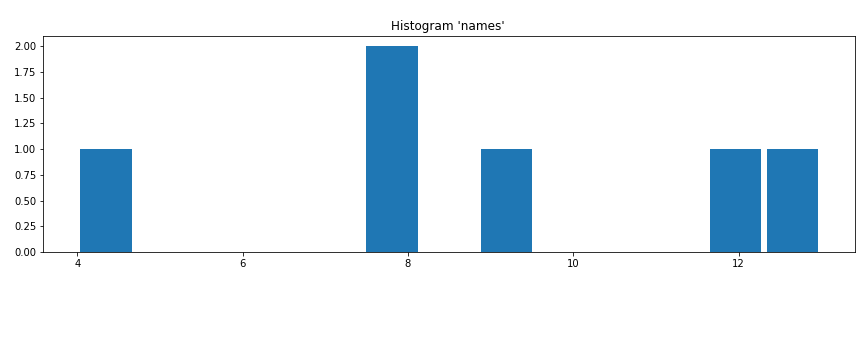
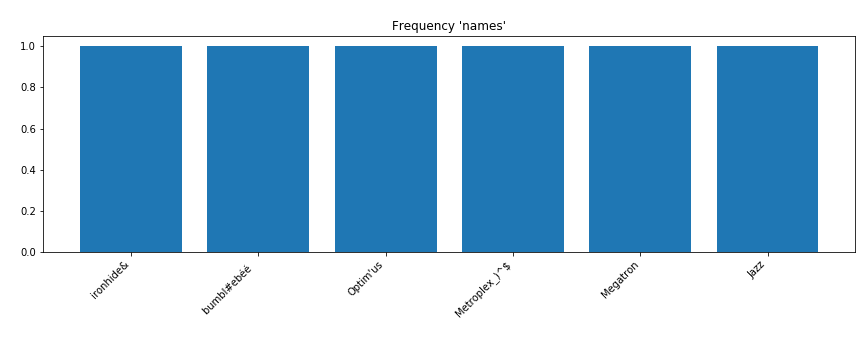

INFO:optimus:run() executed in 36.63 sec


In [70]:
op.profiler.run(df,"names")

In [31]:
 list(enumerate(buckets))

[(0, {'lower': 4, 'upper': 4.6923076923076925, 'bucket': 0}),
 (1, {'lower': 4.6923076923076925, 'upper': 5.384615384615385, 'bucket': 1}),
 (2, {'lower': 5.384615384615385, 'upper': 6.0769230769230775, 'bucket': 2}),
 (3, {'lower': 6.0769230769230775, 'upper': 6.76923076923077, 'bucket': 3}),
 (4, {'lower': 6.76923076923077, 'upper': 7.461538461538463, 'bucket': 4}),
 (5, {'lower': 7.461538461538463, 'upper': 8.153846153846155, 'bucket': 5}),
 (6, {'lower': 8.153846153846155, 'upper': 8.846153846153847, 'bucket': 6}),
 (7, {'lower': 8.846153846153847, 'upper': 9.538461538461538, 'bucket': 7}),
 (8, {'lower': 9.538461538461538, 'upper': 10.23076923076923, 'bucket': 8}),
 (9, {'lower': 10.23076923076923, 'upper': 10.923076923076922, 'bucket': 9}),
 (10,
  {'lower': 10.923076923076922, 'upper': 11.615384615384613, 'bucket': 10}),
 (11,
  {'lower': 11.615384615384613, 'upper': 12.307692307692305, 'bucket': 11}),
 (12, {'lower': 12.307692307692305, 'upper': 13, 'bucket': 12})]

In [ ]:
op.profiler.to_file("asdf")

In [149]:
assert(False)
print("asdafsd")

AssertionError: 

In [ ]:
import altair as alt
import pandas as pd
data = pd.DataFrame({'x': [1, 2, 3], 'y': [2, 1, 2]})

chart = alt.Chart(data).mark_line().encode(
     x='x',
     y='y'
)

from pprint import pprint
pprint(chart.to_dict())

In [8]:
url = 'data.json'
data.to_json(url, orient='records')

chart = alt.Chart(url).mark_line().encode(
    x='x:Q',
    y='y:Q'
)
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v3.2.1.json',
 'config': {'mark': {'tooltip': None}, 'view': {'height': 300, 'width': 400}},
 'data': {'url': 'data.json'},
 'encoding': {'x': {'field': 'x', 'type': 'quantitative'},
              'y': {'field': 'y', 'type': 'quantitative'}},
 'mark': 'line'}


In [9]:
import pandas as pd
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})